In [1]:
## Data Analysis packages
import numpy as np
import pandas as pd

import warnings

## Data Visualization packages
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import matplotlib

# sklearn library
import sklearn

### sklearn preprocessing tools
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer 
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.model_selection import StratifiedKFold,train_test_split
from sklearn.metrics import classification_report,confusion_matrix,roc_curve,auc,accuracy_score,roc_auc_score
from sklearn.preprocessing import StandardScaler, RobustScaler, QuantileTransformer, PowerTransformer,FunctionTransformer,OneHotEncoder

# Error Metrics 
from sklearn.metrics import confusion_matrix ,classification_report
from sklearn.metrics import accuracy_score, precision_score,recall_score,f1_score


### Machine learning classification Models
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import SGDClassifier #stacstic gradient descent clasifeier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import AdaBoostClassifier


#crossvalidation
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import LeaveOneOut


#hyper parameter tunning
from sklearn.model_selection import GridSearchCV,cross_val_score,RandomizedSearchCV


In [2]:
### Initial settings
%matplotlib inline
sns.set_style("darkgrid")
matplotlib.rcParams["font.size"] = 10
matplotlib.rcParams["figure.figsize"] = (8,6)
matplotlib.rcParams["figure.facecolor"] = '#00000000' 
sns.set(rc={
            "font.size":10,
            "axes.titlesize":10,
            "axes.labelsize":15},
             style="darkgrid",
            ) 

warnings.filterwarnings('ignore')
pd.set_option('display.max_colwidth', None)

## Information about the dataset.

- employee_id : Unique Identity of each employee

- age : The actual age of the employee

- gender : male or female

- marital_status : Single or married Or divorced

- salary : The actual salary of the employee

- employment_type : Full time / Part time / Contract

- region : North / South and so on

- has_dependents : Yes or No

- tenure_years  : Number of years enrolled

- enrolled (target: 1 for enrolled, 0 for not enrolled)

## `Data-Import`

In [3]:
raw_data = pd.read_csv("https://github.com/neustackapp/assignment/raw/refs/heads/main/employee_data.csv")
raw_data.head()

,employee_id,age,gender,marital_status,salary,employment_type,region,has_dependents,tenure_years,enrolled
0,10001,60,Female,Single,55122.97,Part-time,West,No,1.5,0
1,10002,50,Female,Single,89549.66,Full-time,West,Yes,12.8,1
2,10003,36,Male,Divorced,74145.66,Part-time,Midwest,No,3.8,0
3,10004,64,Female,Married,53877.83,Full-time,Northeast,No,3.3,0
4,10005,29,Male,Single,63404.63,Contract,Midwest,Yes,10.0,0


## `Train-Test-Split:`

### Doing any kind of transformations before splitting the data leads to `deceitful model.`

In [4]:
from sklearn.model_selection import train_test_split

train_df, test_df = train_test_split(raw_data,random_state=2)
print(f"Train data shape : ", train_df.shape)
print(f"Test data shape : ", test_df.shape)

Train data shape :  (7500, 10)
Test data shape :  (2500, 10)


In [5]:
train_df.head()

,employee_id,age,gender,marital_status,salary,employment_type,region,has_dependents,tenure_years,enrolled
2753,12754,56,Male,Married,69297.05,Full-time,South,Yes,0.5,1
2824,12825,51,Female,Single,76583.42,Part-time,South,Yes,1.6,1
2597,12598,45,Female,Married,94439.96,Full-time,West,Yes,1.3,1
3973,13974,22,Male,Divorced,61050.07,Part-time,Midwest,Yes,3.1,0
3335,13336,50,Female,Married,28380.67,Full-time,South,Yes,13.0,1


In [6]:
## Initial statistical description
train_df.describe() 

,employee_id,age,salary,tenure_years,enrolled
count,7500.000000,7500.000000,7500.000000,7500.000000,7500.000000
mean,14998.246533,42.862800,65003.785275,4.004280,0.614800
std,2877.092961,12.264106,14972.851589,3.886657,0.486675
min,10001.000000,22.000000,2207.790000,0.000000,0.000000
25%,12518.500000,32.000000,54686.437500,1.200000,0.000000
50%,15004.500000,43.000000,64967.675000,2.800000,1.000000
75%,17470.250000,53.000000,75045.142500,5.600000,1.000000
max,19999.000000,64.000000,120312.000000,36.000000,1.000000


### `Observations:`

- Average salary of the employee is 65000, with a deviation of 15000(approx).

- Median of the tenure years is 3(approx), which means 50% of employees were enrolled for more than 3 years.


In [7]:
## General information about the features in train dataset
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7500 entries, 2753 to 7336
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   employee_id      7500 non-null   int64  
 1   age              7500 non-null   int64  
 2   gender           7500 non-null   object 
 3   marital_status   7500 non-null   object 
 4   salary           7500 non-null   float64
 5   employment_type  7500 non-null   object 
 6   region           7500 non-null   object 
 7   has_dependents   7500 non-null   object 
 8   tenure_years     7500 non-null   float64
 9   enrolled         7500 non-null   int64  
dtypes: float64(2), int64(3), object(5)
memory usage: 644.5+ KB


## `Sanity Check`

In [8]:
# Concatenate the count of null values and the percentage of null values into a single DataFrame
nullsFrame = pd.concat([train_df.isnull().sum(), round(train_df.isnull().mean() * 100,2)],
                       axis=1,
                       keys=["Count", "Percentage"])

## print the nullsFrame
print(f"The Data Frame of Missing Values in the Data : \n {nullsFrame}")

The Data Frame of Missing Values in the Data : 
                  Count  Percentage
employee_id          0         0.0
age                  0         0.0
gender               0         0.0
marital_status       0         0.0
salary               0         0.0
employment_type      0         0.0
region               0         0.0
has_dependents       0         0.0
tenure_years         0         0.0
enrolled             0         0.0


In [9]:
### Checking for the duplicate values in the dataset
train_df.duplicated().sum()

np.int64(0)

### No Duplicates and Missing values in the data.

## `Endogeneous Variable study`

The Enrolled column is the target variable.

In [10]:
train_df["enrolled"].value_counts()

enrolled
1    4611
0    2889
Name: count, dtype: int64

## `Exogeneous Varibales`

In [11]:
train_df.columns[:-1]

Index(['employee_id', 'age', 'gender', 'marital_status', 'salary',
       'employment_type', 'region', 'has_dependents', 'tenure_years'],
      dtype='object')

## `Exploratory Data Analysis and Visualization`

Before training a machine learning model, its always a good idea to explore the distributions of various columns and see how they are related to the target column. Let's explore and visualize the data using the Plotly, Matplotlib and Seaborn libraries. Follow these tutorials to learn how to use these libraries:

In [12]:
train_df.corr(numeric_only=True)

,employee_id,age,salary,tenure_years,enrolled
employee_id,1.000000,-0.013402,0.007438,0.003992,0.008361
age,-0.013402,1.000000,0.002858,0.001980,0.260633
salary,0.007438,0.002858,1.000000,-0.002667,0.370186
tenure_years,0.003992,0.001980,-0.002667,1.000000,-0.006686
enrolled,0.008361,0.260633,0.370186,-0.006686,1.000000


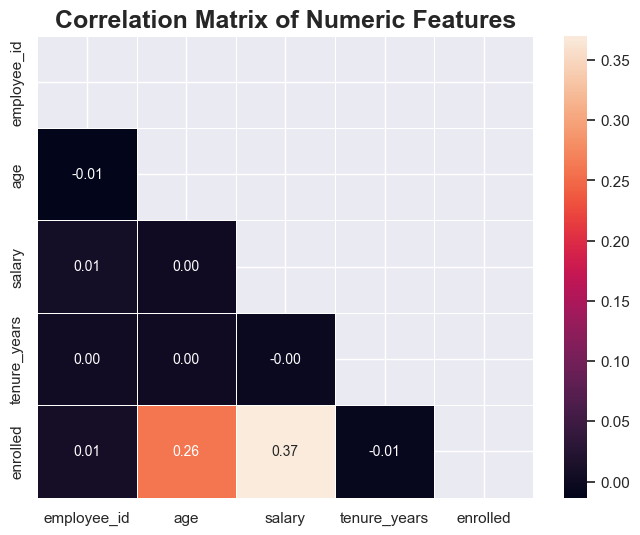

In [13]:
## correlation matrix
correlation_matrix = train_df.corr(numeric_only=True)

## mask
mask = np.triu(np.ones_like(train_df.corr(numeric_only=True)))


## heatmap
sns.heatmap(correlation_matrix, mask=mask, annot=True, fmt=".2f",
            annot_kws={'size': 10}, linewidths=0.5, cbar=True)

## title
plt.title("Correlation Matrix of Numeric Features", fontsize=18, weight="bold")

## Show the plot
plt.show()

### `Observations`:

The Salary and age relatively have the higher impact on the target variable than other variables.

## `Data distribution graphs`

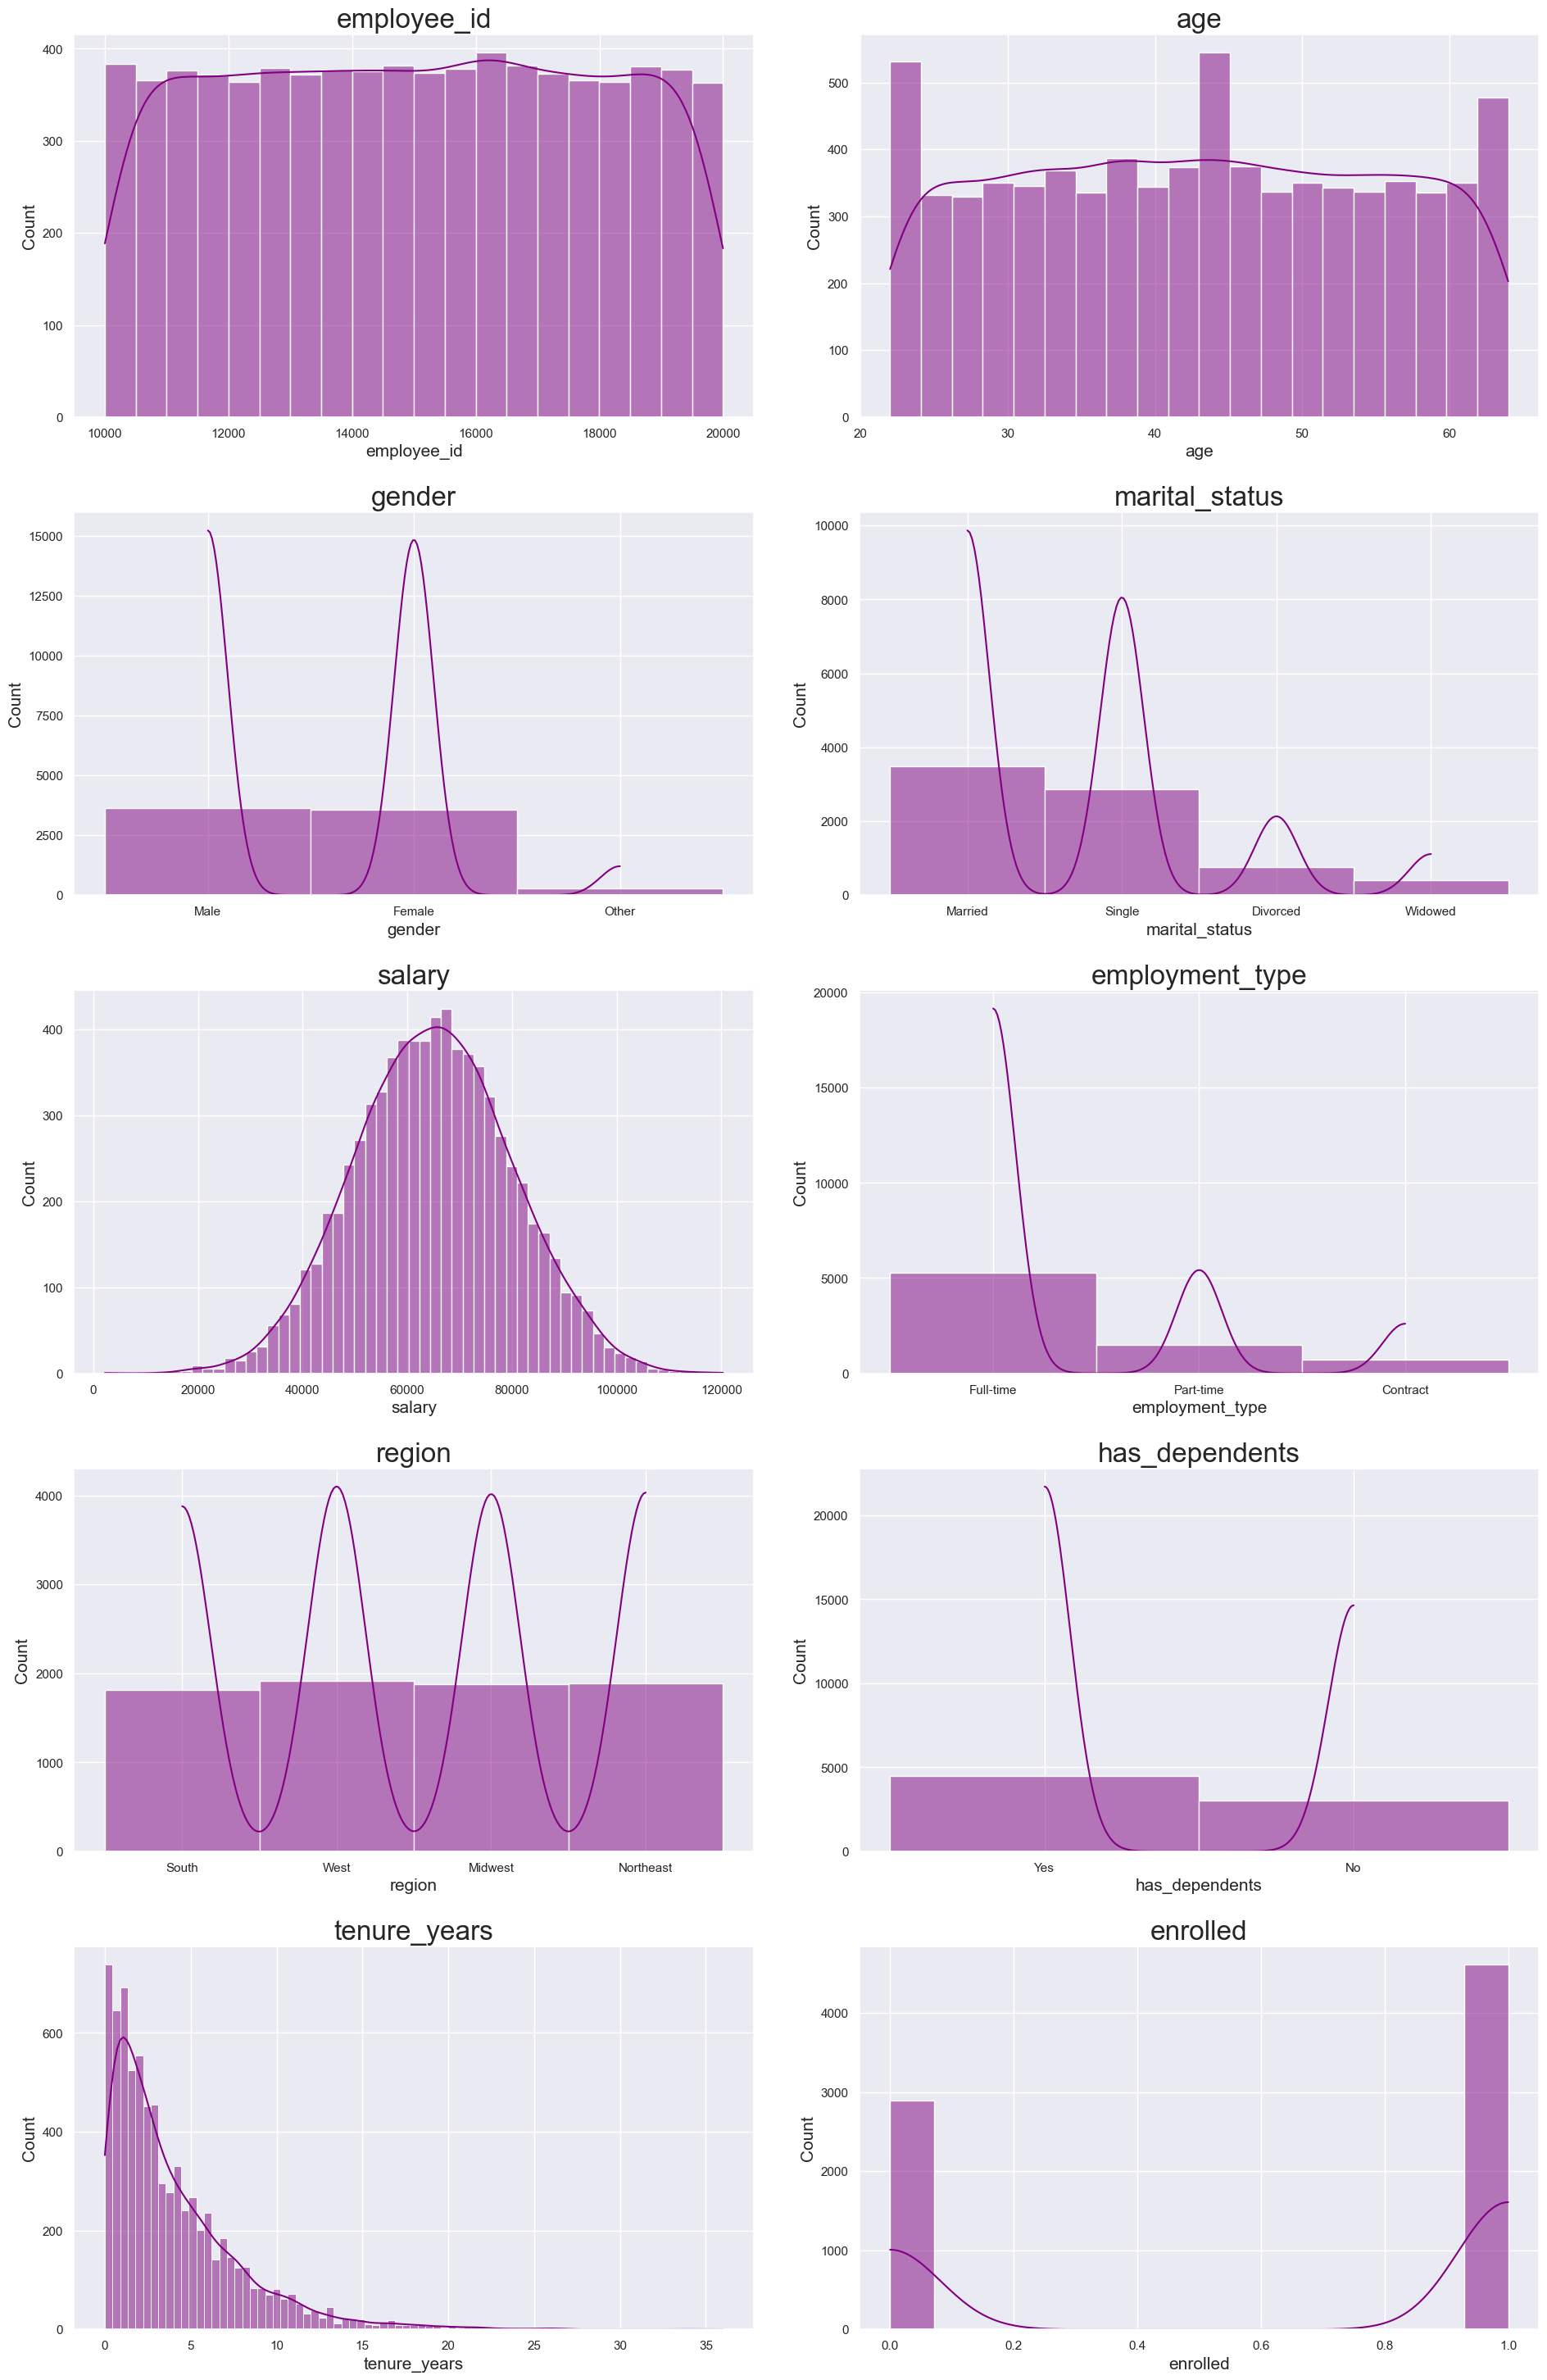

In [14]:
sns.set(rc={
            "font.size":15,
            "axes.titlesize":10,
            "axes.labelsize":15},
             style="darkgrid")
fig, axs = plt.subplots(5,2, figsize=(20,30))
fig.tight_layout(pad=4.0)

for f,ax in zip(train_df,axs.ravel()):
    sns.set(font_scale = 2)
    ax=sns.histplot(ax=ax,data=train_df,x=train_df[f],kde=True,color='purple')
    ax.set_title(f)

## `Piechart percentage distribution features`

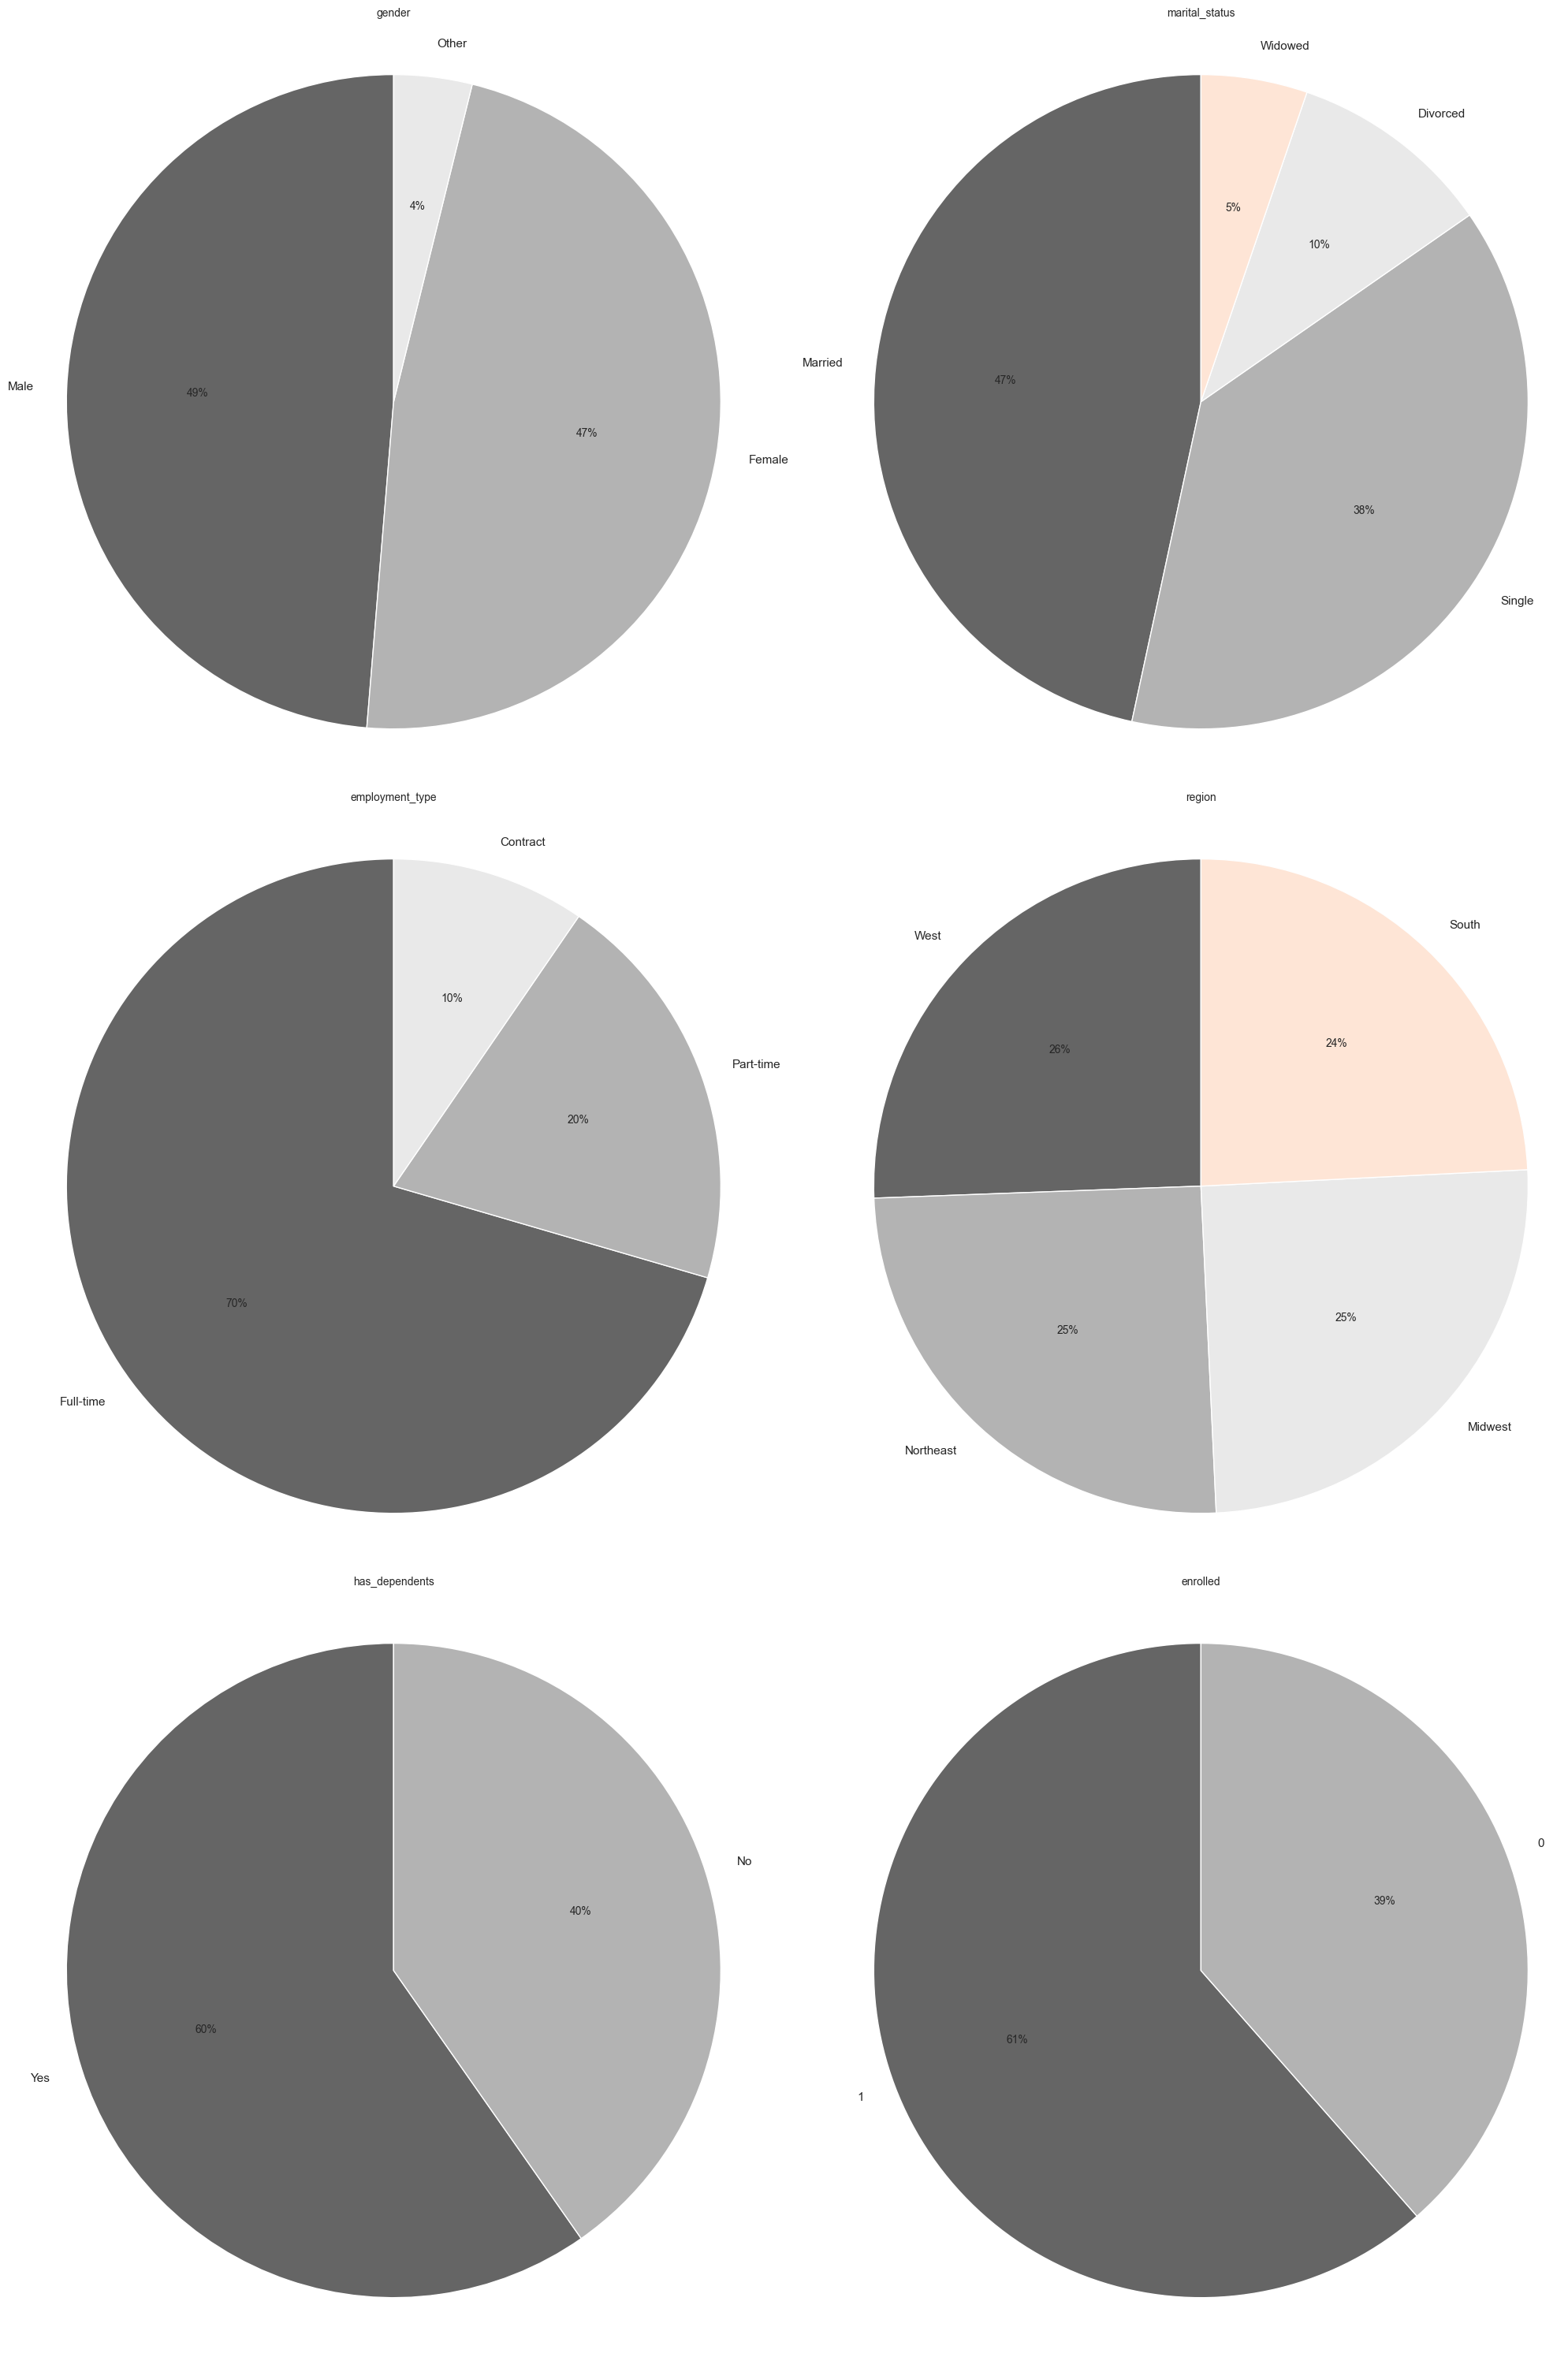

In [15]:

new_train_df = train_df.copy()
new_train_df.drop(['employee_id', 'age','tenure_years','salary'], axis=1, inplace=True)

sns.set(rc={"font.size":10, "axes.titlesize":10, "axes.labelsize":13}, style="darkgrid")

fig, axes = plt.subplots(3, 2, figsize=(20, 30))  # 5 rows, 2 columns

for i, col in enumerate(new_train_df):
    column_values = new_train_df[col].value_counts()
    labels = column_values.index
    sizes = column_values.values
    
    axes[i//2, i%2].pie(sizes, labels=labels, colors=sns.color_palette("RdGy_r"), autopct='%1.0f%%', startangle=90)
    axes[i//2, i%2].axis('equal')
    axes[i//2, i%2].set_title(col)

plt.tight_layout()
plt.show()


### `Observations`:

- The number of men and women in this sample is approximately the same

- Majority of the customers Married.

- The vast majority of our customers are Full-Time employees.

- Most of our customers have dependents.

- Customers are approximately same in the all the regions.


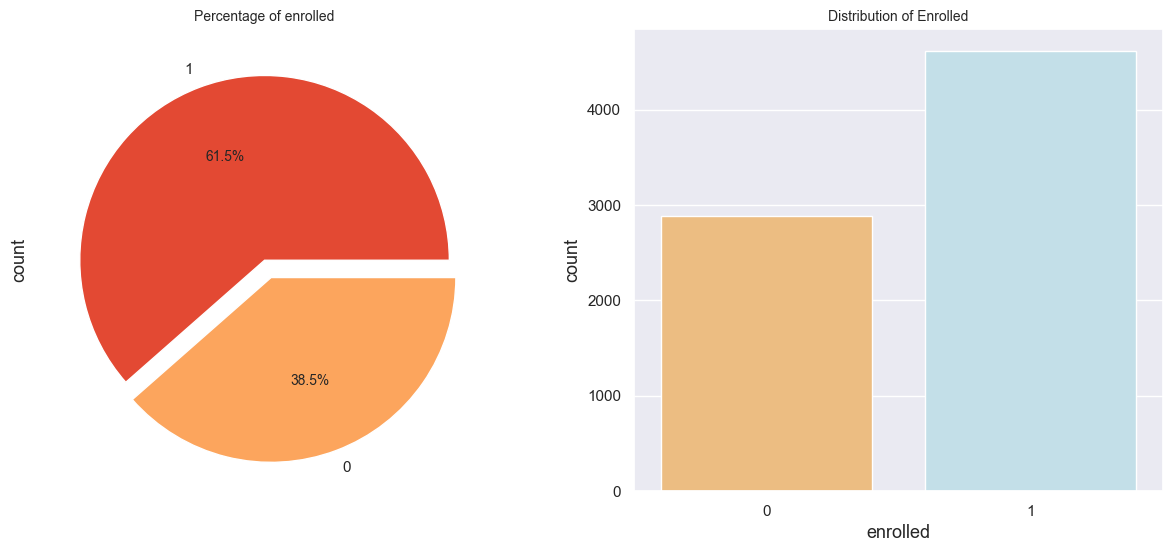

In [16]:
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(15,6))
train_df['enrolled'].value_counts().plot.pie(explode=[0,0.1],colors = sns.color_palette("RdYlBu"),autopct='%1.1f%%',ax=ax1)
ax1.set_title('Percentage of enrolled')
sns.countplot(x='enrolled',data=train_df,ax=ax2,palette='RdYlBu')
ax2.set_title('Distribution of Enrolled')
plt.show()

### `Observations`:

- As per the given data, 61.5% people are enrolled and 38.5% are not enrolled.

To analyse and visualise the data lets divide data columns into categorical and numerical columns.

In [17]:
# numerical and categoriacl columns(features)
numeric_cols = train_df.select_dtypes(include=np.number).columns.tolist()
categorical_cols = train_df.select_dtypes('object').columns.tolist()

In [18]:
# numerical features
print("Total numeric columns are:", len(numeric_cols))
print(numeric_cols)

Total numeric columns are: 5
['employee_id', 'age', 'salary', 'tenure_years', 'enrolled']


In [19]:
# categorical features
print("Total categorical columns are:", len(categorical_cols))
print(categorical_cols)

Total categorical columns are: 5
['gender', 'marital_status', 'employment_type', 'region', 'has_dependents']


In [20]:
numeric_cols.remove("enrolled")

## `Exploratory Data Analysis and Visualization on Numerical Columns`

### **Boxplot: To check the Outliers in the numerical columns.**

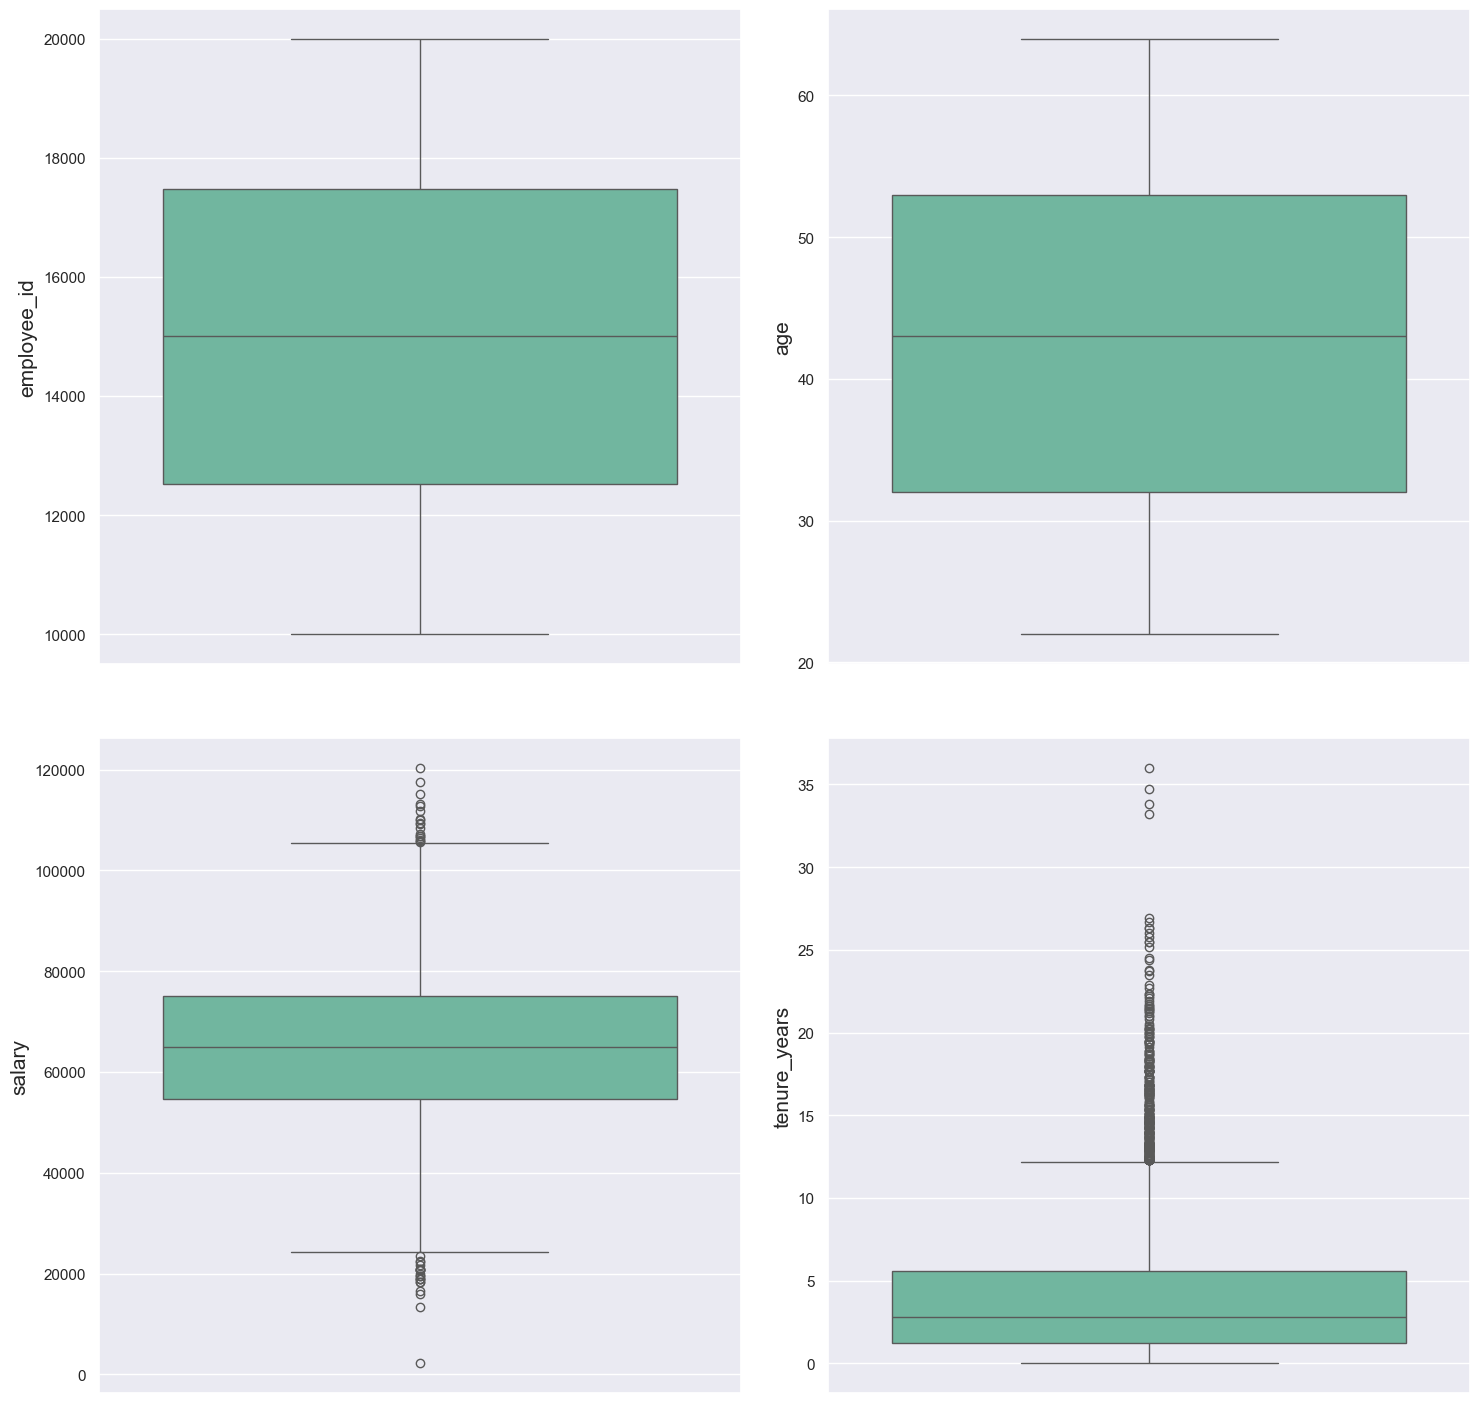

In [21]:
sns.set(rc={
            "font.size":10,
            "axes.titlesize":10,
            "axes.labelsize":15},
             style="darkgrid",
            )

fig, axs = plt.subplots(2,2, figsize=(15,15))
fig.tight_layout(pad=3.0)

for f,ax in zip(numeric_cols,axs.ravel()):
    sns.set(font_scale = 2)
    ax=sns.boxplot(ax=ax,data=train_df,y=train_df[f],palette='BuGn')

### `Observations:`

- The Salary and Tenure years have outliers.

### **Barplot representation of numerical feature**

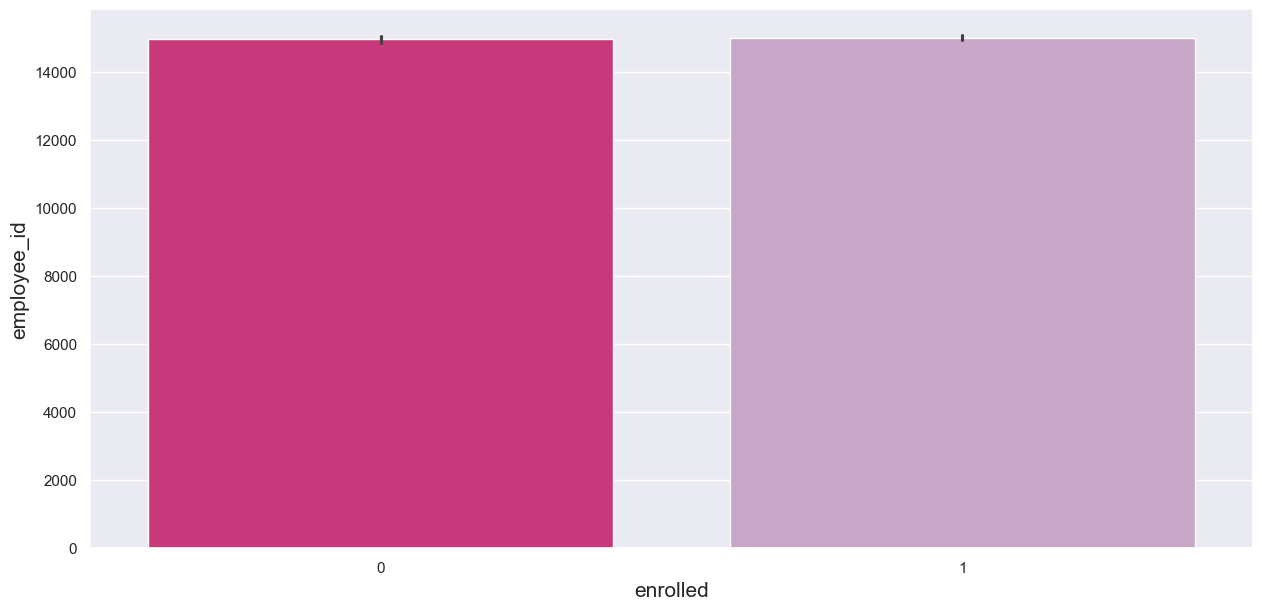

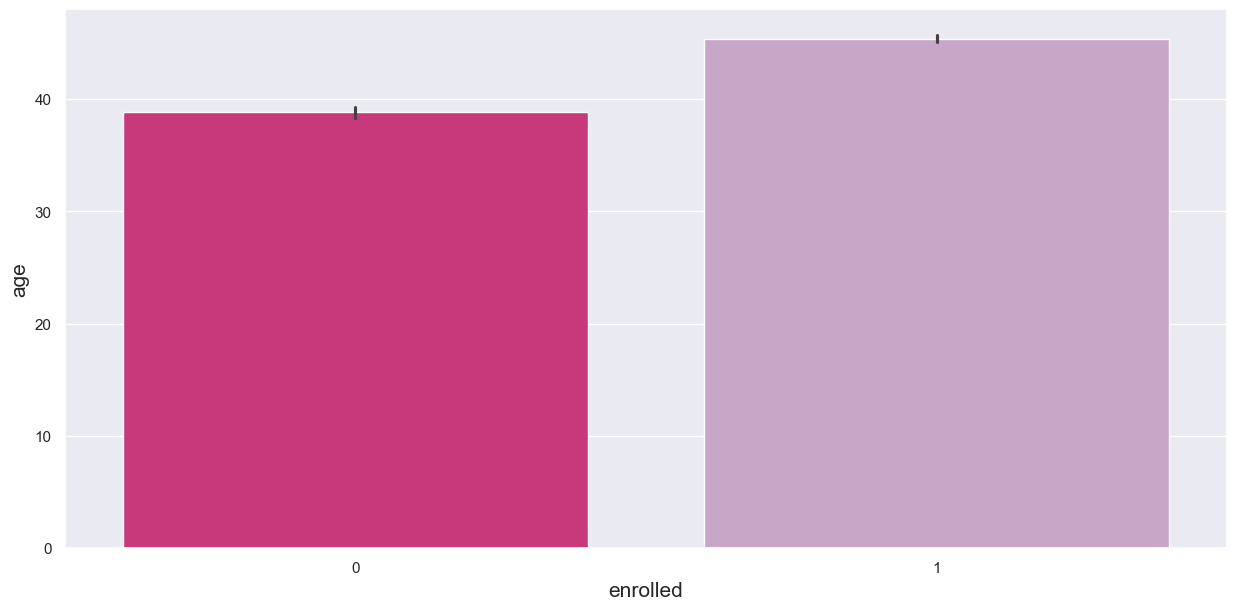

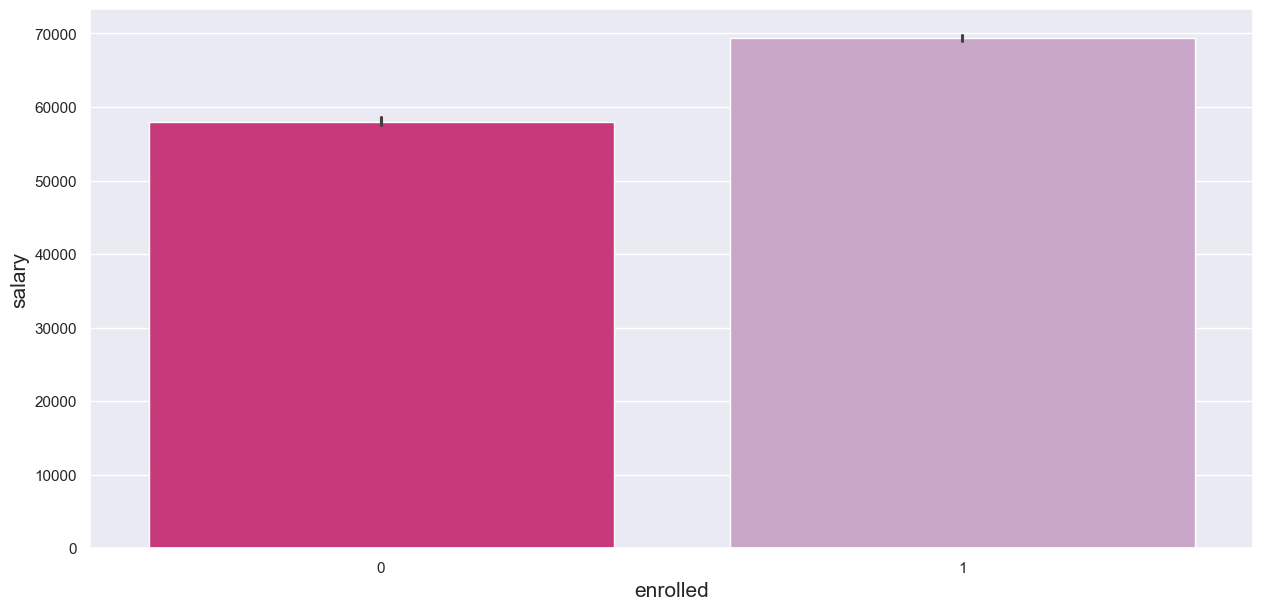

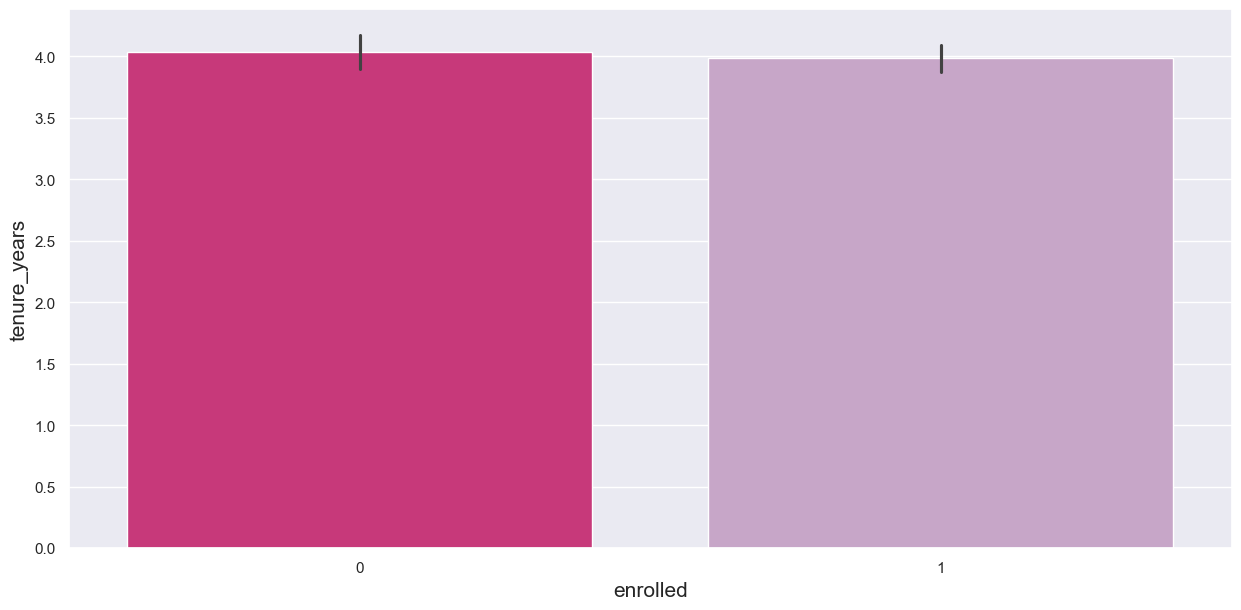

In [22]:
#Plotting the barplot of numerical features
sns.set(rc={'figure.figsize':(15,7),
            "font.size":10,
            "axes.titlesize":10,
            "axes.labelsize":15},
             style="darkgrid")
for i in numeric_cols:
    sns.barplot(data=train_df,x='enrolled',y=i,palette='PuRd_r')
    plt.show()

### `Observations:`

- From the above graphs, it is clear that Age and salary play a significant role in insurance enrollment.

## `Exploratory Data Analysis and Visualization on categorical column.`

### **Barplot representation on categorical features**

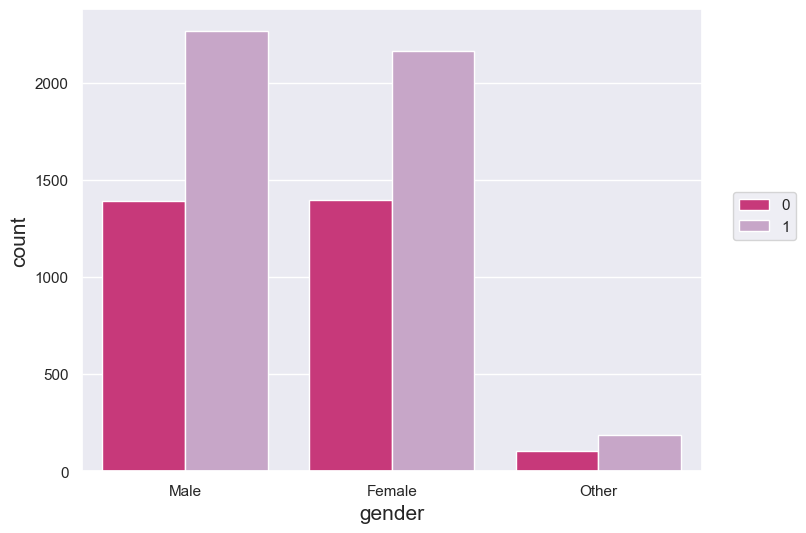

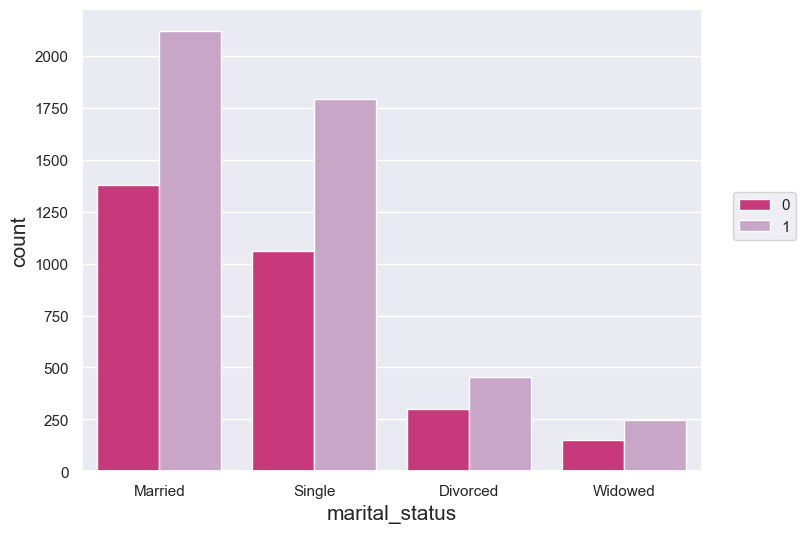

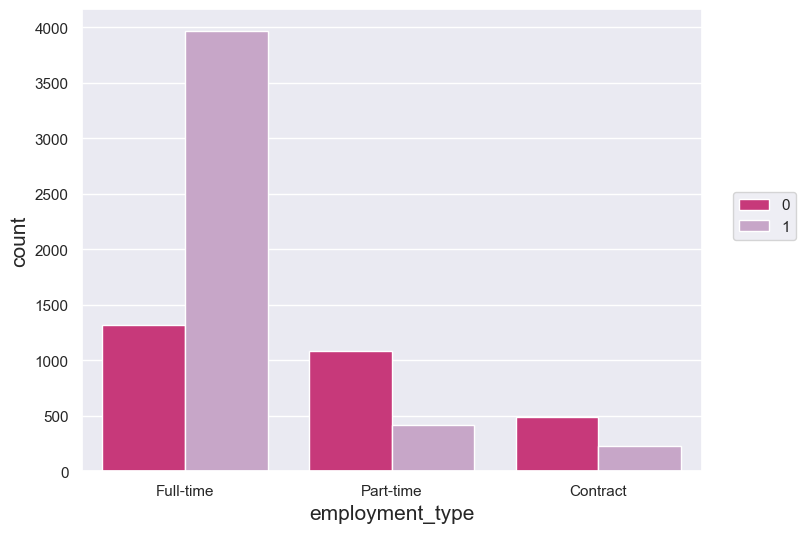

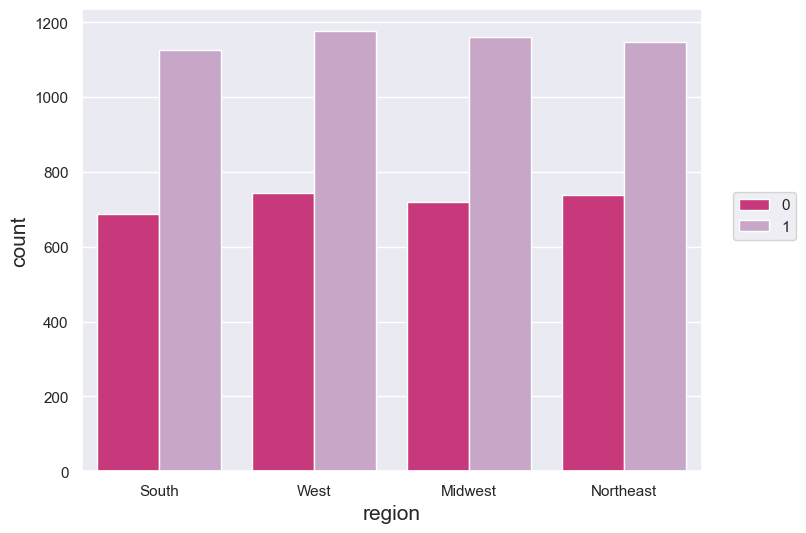

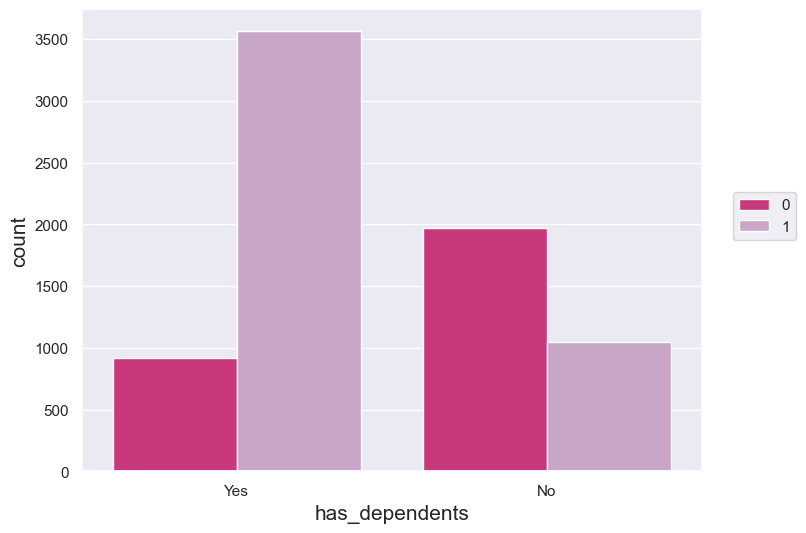

In [23]:
sns.set(rc={'figure.figsize':(20,10),
            "font.size":10,
            "axes.titlesize":10,
            "axes.labelsize":15},
             style="darkgrid",
            )

for col in categorical_cols:
    plt.figure(figsize=(8,6)) 
    sns.countplot(data=train_df,x=col,hue ='enrolled',palette='PuRd_r')
    plt.legend(loc=(1.05,0.5))

## `Observations:`

- Employee type, marital status and has_dependents have a strong impact on Insurance enrollment.

## `Data Preprocessing and Feature Engineering`

In [24]:
train_df.isnull().sum()

employee_id        0
age                0
gender             0
marital_status     0
salary             0
employment_type    0
region             0
has_dependents     0
tenure_years       0
enrolled           0
dtype: int64

In [25]:
# step1: Independent features and dependent features
input_cols = list(train_df.iloc[:,:-1])# independent features
target_col="enrolled" # dependent feature 

In [26]:
train_val_df, test_df = train_test_split(train_df, test_size=0.2, random_state=42)
train_df, val_df = train_test_split(train_val_df, test_size=0.25, random_state=42)

In [27]:
print(train_df.shape)
print(val_df.shape)
print(test_df.shape)

(4500, 10)
(1500, 10)
(1500, 10)


lets take copy of the datasets, so that there will not be further changes in the orignal dataset

In [28]:
# copy of training dataset 
train_inputs = train_df[input_cols].copy()
train_targets = train_df[target_col].copy()

# copy of valdation dataset

val_inputs = val_df[input_cols].copy()
val_targets = val_df[target_col].copy()

# copy of test dataset

test_inputs = test_df[input_cols].copy()
test_targets = test_df[target_col].copy()

## `Scaling the numerical features`

In [29]:
numeric_cols

['employee_id', 'age', 'salary', 'tenure_years']

In [30]:
# Scale numeric features 
scaler = MinMaxScaler().fit(train_df[numeric_cols])
train_inputs[numeric_cols] = scaler.transform(train_inputs[numeric_cols])
val_inputs[numeric_cols] = scaler.transform(val_inputs[numeric_cols])
test_inputs[numeric_cols] = scaler.transform(test_inputs[numeric_cols])

In [31]:
train_inputs[numeric_cols].describe()

,employee_id,age,salary,tenure_years
count,4500.000000,4500.000000,4500.000000,4500.000000
mean,0.502217,0.498444,0.481154,0.109889
std,0.286998,0.294102,0.140694,0.107254
min,0.000000,0.000000,0.000000,0.000000
25%,0.256052,0.238095,0.384291,0.033333
50%,0.508302,0.500000,0.480946,0.077778
75%,0.747049,0.761905,0.576902,0.155556
max,1.000000,1.000000,1.000000,1.000000


## `One-hot encode categorical feature`

In [32]:
# One-hot encode categorical features
encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False).fit(train_df[categorical_cols])
encoded_cols = list(encoder.get_feature_names_out(categorical_cols))
encoded_cols

['gender_Female',
 'gender_Male',
 'gender_Other',
 'marital_status_Divorced',
 'marital_status_Married',
 'marital_status_Single',
 'marital_status_Widowed',
 'employment_type_Contract',
 'employment_type_Full-time',
 'employment_type_Part-time',
 'region_Midwest',
 'region_Northeast',
 'region_South',
 'region_West',
 'has_dependents_No',
 'has_dependents_Yes']

In [33]:
train_inputs[encoded_cols] = encoder.transform(train_inputs[categorical_cols])
val_inputs[encoded_cols] = encoder.transform(val_inputs[categorical_cols])
test_inputs[encoded_cols] = encoder.transform(test_inputs[categorical_cols])

In [34]:
test_inputs

,employee_id,age,gender,marital_status,salary,employment_type,region,has_dependents,tenure_years,gender_Female,...,marital_status_Widowed,employment_type_Contract,employment_type_Full-time,employment_type_Part-time,region_Midwest,region_Northeast,region_South,region_West,has_dependents_No,has_dependents_Yes
4237,0.423827,0.976190,Female,Married,0.447236,Full-time,Northeast,Yes,0.227778,1.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
245,0.024507,0.261905,Female,Divorced,0.588052,Full-time,South,Yes,0.269444,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
1468,0.146844,0.976190,Female,Divorced,0.675363,Part-time,Northeast,No,0.144444,1.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
4092,0.409323,0.190476,Female,Single,0.331141,Contract,South,Yes,0.052778,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
7554,0.755627,0.928571,Male,Single,0.296304,Part-time,West,No,0.141667,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3232,0.323297,0.119048,Female,Married,0.237858,Full-time,Northeast,No,0.055556,1.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
2357,0.235771,0.785714,Male,Married,0.533448,Full-time,Northeast,Yes,0.044444,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1130,0.113034,0.071429,Male,Married,0.451566,Part-time,South,Yes,0.022222,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
2982,0.298289,0.690476,Male,Married,0.496597,Part-time,South,Yes,0.050000,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0


## Saving Processed Data to Disk

It can be useful to save processed data to disk, especially for really large datasets, to avoid repeating the preprocessing steps every time you start the Jupyter notebook. The parquet format is a fast and efficient format for saving and loading Pandas dataframes.

In [35]:
# check the shape of the data before saving data in parquet.
print('train_inputs:', train_inputs.shape)
print('train_targets:', train_targets.shape)
print('val_inputs:', val_inputs.shape)
print('val_targets:', val_targets.shape)
print('test_inputs:', test_inputs.shape)
print('test_targets:', test_targets.shape)

train_inputs: (4500, 25)
train_targets: (4500,)
val_inputs: (1500, 25)
val_targets: (1500,)
test_inputs: (1500, 25)
test_targets: (1500,)


In [36]:
# # Save processed data to disk
# train_inputs.to_parquet('train_inputs.parquet')
# val_inputs.to_parquet('val_inputs.parquet')
# test_inputs.to_parquet('test_inputs.parquet')
# pd.DataFrame(train_targets).to_parquet('train_targets.parquet')
# pd.DataFrame(val_targets).to_parquet('val_targets.parquet')


In [37]:
# Load processed data from disk
train_inputs = pd.read_parquet('../data/train_inputs.parquet')
val_inputs = pd.read_parquet('../data/val_inputs.parquet')
test_inputs = pd.read_parquet('../data/test_inputs.parquet')
train_targets = pd.read_parquet('../data/train_targets.parquet')[target_col]
val_targets = pd.read_parquet('../data/val_targets.parquet')[target_col]

In [38]:
# check the shape of the data after saving data in parquet.
print('train_inputs:', train_inputs.shape)
print('train_targets:', train_targets.shape)
print('val_inputs:', val_inputs.shape)
print('val_targets:', val_targets.shape)
print('test_inputs:', test_inputs.shape)
print('test_targets:', test_targets.shape)

train_inputs: (4500, 25)
train_targets: (4500,)
val_inputs: (1500, 25)
val_targets: (1500,)
test_inputs: (1500, 25)
test_targets: (1500,)


In [39]:
train_df["enrolled"]

970     0
2851    1
9103    1
9627    0
9687    1
       ..
9471    0
5998    1
4146    1
9063    1
5436    0
Name: enrolled, Length: 4500, dtype: int64

In [40]:
# Select the columns to be used for training/prediction

# training dataset
X_train = train_inputs[numeric_cols + encoded_cols]
y_train = train_df["enrolled"]

# validation dataset
X_val = val_inputs[numeric_cols + encoded_cols]
y_val=  val_df["enrolled"]

# test dataset
X_test = test_inputs[numeric_cols + encoded_cols]
y_test= test_df["enrolled"]

In [41]:
y_train.value_counts()

enrolled
1    2779
0    1721
Name: count, dtype: int64

In [42]:
y_val.value_counts()

enrolled
1    906
0    594
Name: count, dtype: int64

In [43]:
y_test.value_counts()

enrolled
1    926
0    574
Name: count, dtype: int64

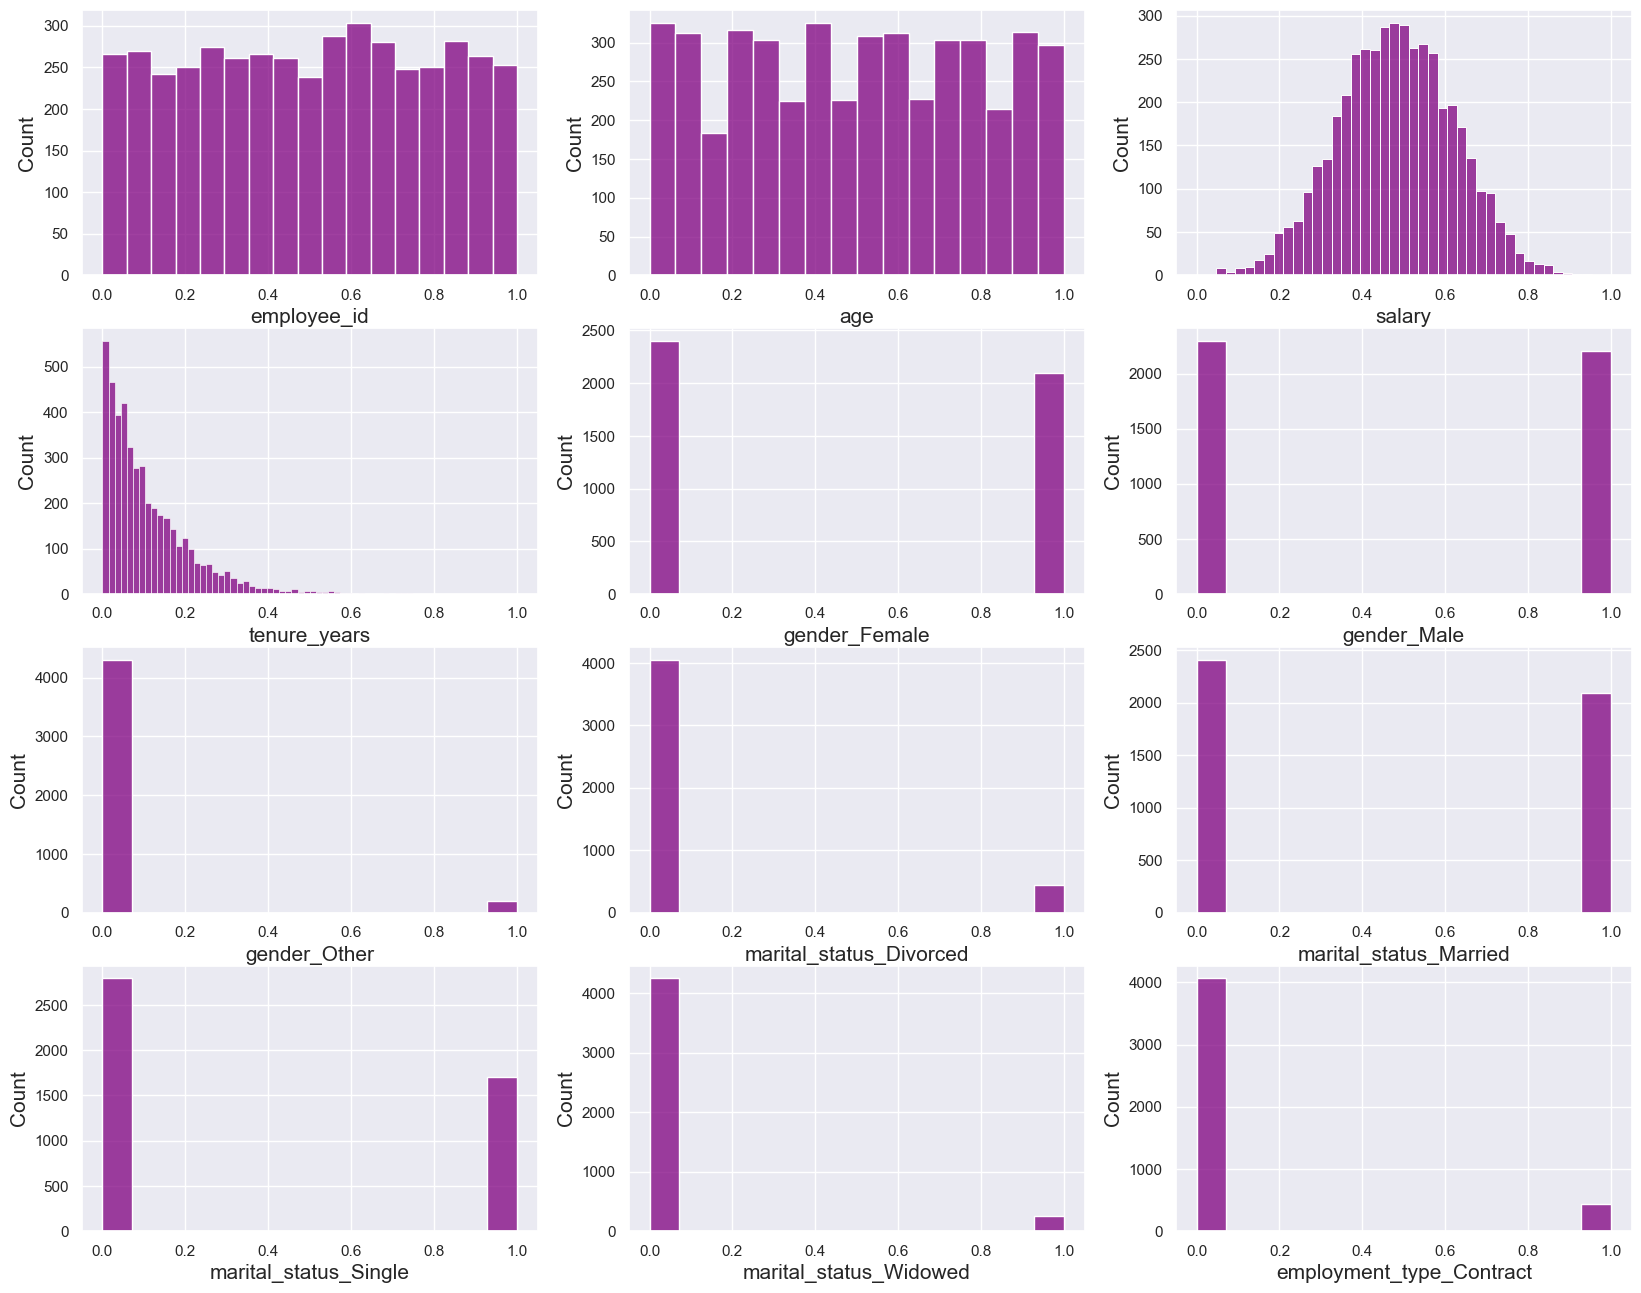

In [44]:
### Distribution after transformation 

columnList = list(X_train.columns)
columnList

fig = plt.figure(figsize=[20,20])
for col,i in zip(columnList,range(1,13)):
    axes = fig.add_subplot(5,3,i)
    sns.histplot(X_train[col],ax=axes, kde_kws={'bw':1.5}, color='purple')
plt.show();

## `Data Modelling`

### `Helper function`

In [45]:
def plot_roc_curve(y_true,y_prob_preds):
    """
    To plot the ROC curve for the given predictions and model

    """ 
    plt.rcParams["figure.figsize"] = (6,6)
    fpr,tpr,threshold = roc_curve(y_true,y_prob_preds)
    roc_auc = auc(fpr,tpr)
    fig, ax = plt.subplots(1, figsize=(9,6))
    ax.plot(fpr,tpr,"b",label="AUC = %0.2f" % roc_auc)
    ax.set_title("Receiver Operating Characteristic")
    ax.legend(loc='lower right')
    ax.plot([0,1],[0,1],'r--')
    ax.set_xlim([0,1])
    ax.set_ylim([0,1])
    ax.set_xlabel("False Positive Rate")
    ax.set_ylabel("True Positive Rate");
    plt.show();


In [46]:
from sklearn.metrics import  ConfusionMatrixDisplay

In [47]:
from sklearn.model_selection import cross_validate

In [48]:
def cross_val_score(model,inputs,targets,model_name=None,record=False):
    """
     To Generate the classification report with all the metrics of a given model with confusion matrix as well as ROC AUC curve.

    """
    ### Getting the model name from model object
    if model_name is None: 
        model_name = str(type(model)).split(".")[-1][0:-2]

    ### Making the predictions for the given model
    preds = model.predict(inputs)
    if model_name in ["LinearSVC","SVC"]:
      prob_preds = model.decision_function(inputs)
    else:
      prob_preds = model.predict_proba(inputs)[:,1]
    scores = cross_validate(model, X_train, y_train, cv=5, scoring='accuracy')

    print(scores)
    print("Mean Cross validation score", scores['test_score'].mean())

    print("Bias Error:", 1-scores['test_score'].mean())
    print("Variance Error:", np.var(scores['test_score']))

    ### printing the ROC AUC score
    auc_score = roc_auc_score(targets,prob_preds)
    print("ROC AUC Score : {:.2f}%\n".format(auc_score * 100.0))
    plot_roc_curve(targets,prob_preds)
    

## `Non Tree Models`

### `Logistic Regression`

		LOGISTICREGRESSION MODEL

Training part:
              precision    recall  f1-score   support

Not enrolled       0.85      0.82      0.84      1721
    enrolled       0.89      0.91      0.90      2779

    accuracy                           0.88      4500
   macro avg       0.87      0.87      0.87      4500
weighted avg       0.88      0.88      0.88      4500

validation part:
              precision    recall  f1-score   support

Not enrolled       0.40      0.38      0.39       594
    enrolled       0.61      0.63      0.62       906

    accuracy                           0.53      1500
   macro avg       0.50      0.50      0.50      1500
weighted avg       0.52      0.53      0.53      1500

Accuracy score for training dataset 0.8786666666666667
Accuracy score for validation dataset 0.5286666666666666
{'fit_time': array([0.02627516, 0.02810645, 0.04619527, 0.04897189, 0.05976558]), 'score_time': array([0.00244522, 0.00341916, 0.00517082, 0.00450706, 0.0059216 ]), 'test_sco

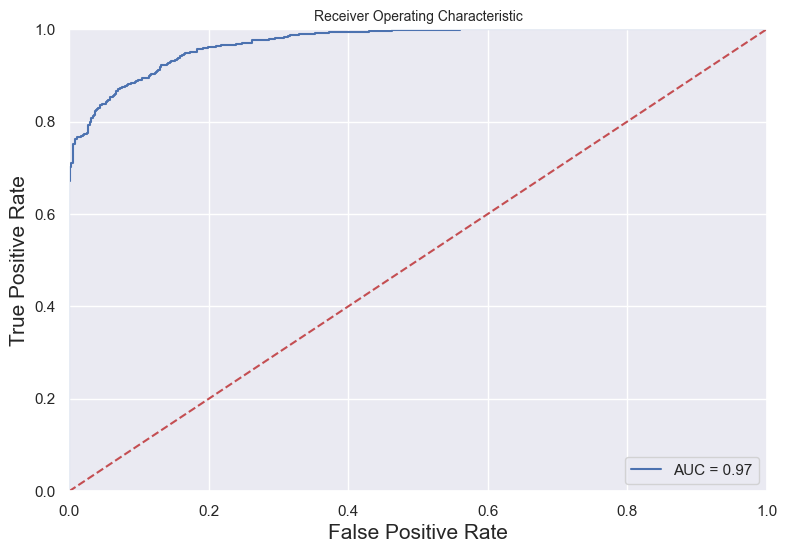

In [49]:
# import the model
from sklearn.linear_model import LogisticRegression

#fit the model
model = LogisticRegression()
model.fit(X_train,y_train)

# prediction
pred_train = model.predict(X_train)
pred_val = model.predict(X_test)

# model name
model_name = str(type(model)).split(".")[-1][0:-2]
print(f"\t\t{model_name.upper()} MODEL\n")

print('Training part:')
print(classification_report(y_train, pred_train,
                                    target_names=['Not enrolled', 'enrolled']))
print('validation part:')
print(classification_report(y_val, pred_val,
                                    target_names=['Not enrolled', 'enrolled']))
print("Accuracy score for training dataset",accuracy_score(y_train, pred_train))
print("Accuracy score for validation dataset",accuracy_score(y_val, pred_val))

cross_val_score(model,X_val,y_val)

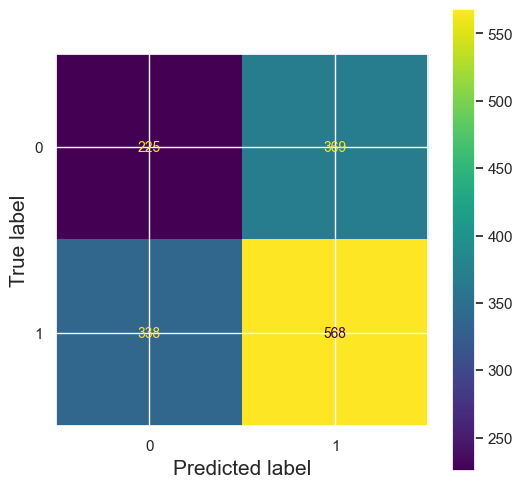

In [50]:
cm = confusion_matrix(y_val, pred_val, labels=model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=model.classes_)
disp.plot()

### Observations:

- The auc roc score is 97.12 %
- But this model is not working good with validation data.

## `Gaussian Naive Bayes`

		GAUSSIANNB MODEL

Training part:
              precision    recall  f1-score   support

Not enrolled       0.75      0.82      0.78      1721
    enrolled       0.88      0.83      0.86      2779

    accuracy                           0.83      4500
   macro avg       0.82      0.83      0.82      4500
weighted avg       0.83      0.83      0.83      4500

validation part:
              precision    recall  f1-score   support

Not enrolled       0.78      0.82      0.80       594
    enrolled       0.88      0.85      0.86       906

    accuracy                           0.84      1500
   macro avg       0.83      0.83      0.83      1500
weighted avg       0.84      0.84      0.84      1500

Accuracy score for training dataset 0.8268888888888889
Accuracy score for validation dataset 0.8366666666666667
{'fit_time': array([0.00343943, 0.00294614, 0.00345612, 0.00283384, 0.0031743 ]), 'score_time': array([0.0020082 , 0.00189924, 0.00216198, 0.00196433, 0.00179553]), 'test_score': arr

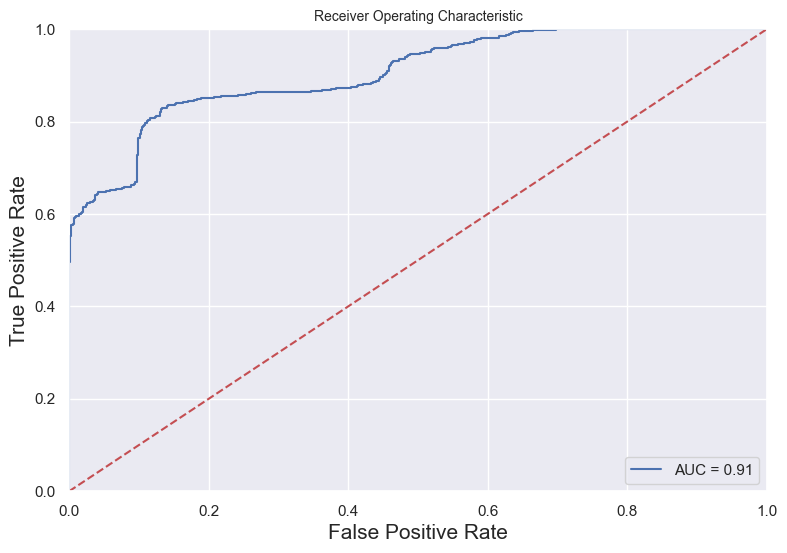

In [51]:
# import the model
from sklearn.naive_bayes import GaussianNB

#fit the model
model =GaussianNB()
model.fit(X_train,y_train)

# prediction
pred_train = model.predict(X_train)
pred_val = model.predict(X_val)

# model name
model_name = str(type(model)).split(".")[-1][0:-2]
print(f"\t\t{model_name.upper()} MODEL\n")

print('Training part:')
print(classification_report(y_train, pred_train,
                                    target_names=['Not enrolled', 'enrolled']))
print('validation part:')
print(classification_report(y_val, pred_val,
                                    target_names=['Not enrolled', 'enrolled']))
print("Accuracy score for training dataset",accuracy_score(y_train, pred_train))
print("Accuracy score for validation dataset",accuracy_score(y_val, pred_val))

cross_val_score(model,X_val,y_val)

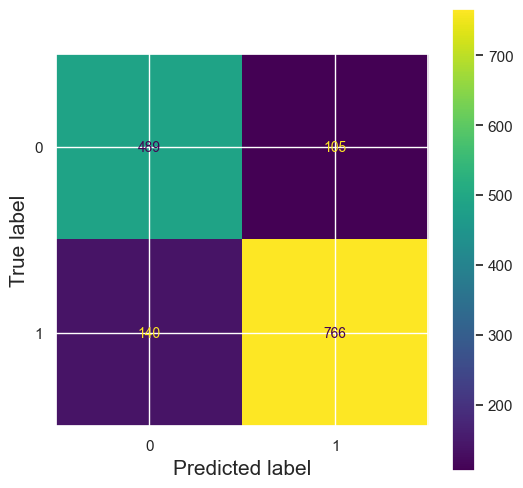

In [52]:
cm = confusion_matrix(y_val, pred_val, labels=model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=model.classes_)
disp.plot()

### Observations:

- The auc roc score is 90.54 %
- This model performed better than Logistic Regression.

### `SVM(Support Vector Machines)`

		LINEARSVC MODEL

Training part:
              precision    recall  f1-score   support

Not enrolled       0.85      0.83      0.84      1721
    enrolled       0.90      0.91      0.91      2779

    accuracy                           0.88      4500
   macro avg       0.88      0.87      0.87      4500
weighted avg       0.88      0.88      0.88      4500

validation part:
              precision    recall  f1-score   support

Not enrolled       0.89      0.86      0.87       594
    enrolled       0.91      0.93      0.92       906

    accuracy                           0.90      1500
   macro avg       0.90      0.89      0.90      1500
weighted avg       0.90      0.90      0.90      1500

Accuracy score for training dataset 0.8822222222222222
Accuracy score for validation dataset 0.9013333333333333
{'fit_time': array([0.00707436, 0.00688958, 0.00687361, 0.00722265, 0.00726509]), 'score_time': array([0.00239253, 0.00218701, 0.00210118, 0.00221729, 0.00207686]), 'test_score': arra

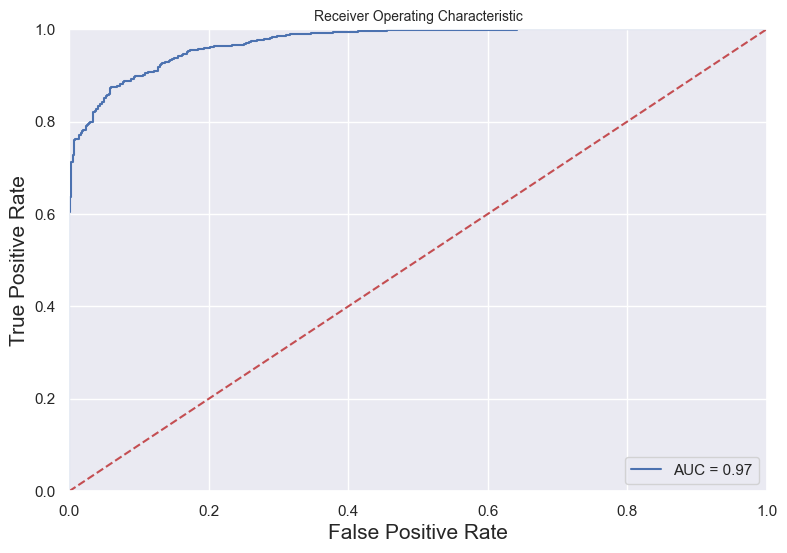

In [53]:
# import the model
from sklearn.svm import LinearSVC

#fit the model
model =LinearSVC()
model.fit(X_train,y_train)

# prediction
pred_train = model.predict(X_train)
pred_val = model.predict(X_val)

# model name
model_name = str(type(model)).split(".")[-1][0:-2]
print(f"\t\t{model_name.upper()} MODEL\n")

print('Training part:')
print(classification_report(y_train, pred_train,
                                    target_names=['Not enrolled', 'enrolled']))
print('validation part:')
print(classification_report(y_val, pred_val,
                                    target_names=['Not enrolled', 'enrolled']))
print("Accuracy score for training dataset",accuracy_score(y_train, pred_train))
print("Accuracy score for validation dataset",accuracy_score(y_val, pred_val))

cross_val_score(model,X_val,y_val)

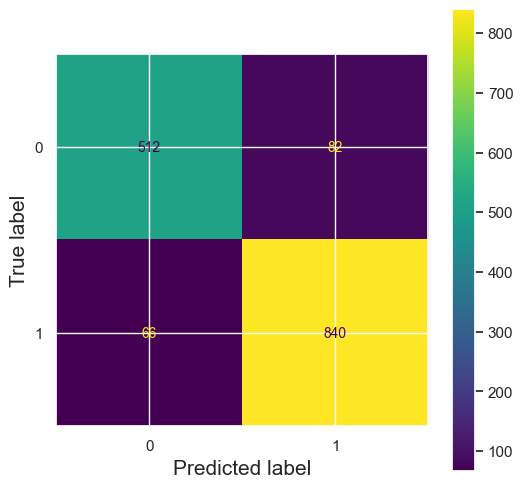

In [54]:
cm = confusion_matrix(y_val, pred_val, labels=model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=model.classes_)
disp.plot()

### Observations:

- ROC-AUC Score: 97%
- This model performed really better interms of predicting True Positives and True Negatives.

## `K-Nearest Neighbours`:

		KNEIGHBORSCLASSIFIER MODEL

Training part:
              precision    recall  f1-score   support

Not enrolled       0.92      0.85      0.88      1721
    enrolled       0.91      0.95      0.93      2779

    accuracy                           0.91      4500
   macro avg       0.91      0.90      0.91      4500
weighted avg       0.91      0.91      0.91      4500

validation part:
              precision    recall  f1-score   support

Not enrolled       0.88      0.76      0.82       594
    enrolled       0.86      0.93      0.89       906

    accuracy                           0.87      1500
   macro avg       0.87      0.85      0.86      1500
weighted avg       0.87      0.87      0.86      1500

Accuracy score for traing dataset 0.912
Accuracy score for validation dataset 0.8653333333333333
{'fit_time': array([0.00425243, 0.00279784, 0.00282073, 0.00282645, 0.00278759]), 'score_time': array([0.04718518, 0.05400586, 0.05742574, 0.04470372, 0.04606962]), 'test_score': array([0

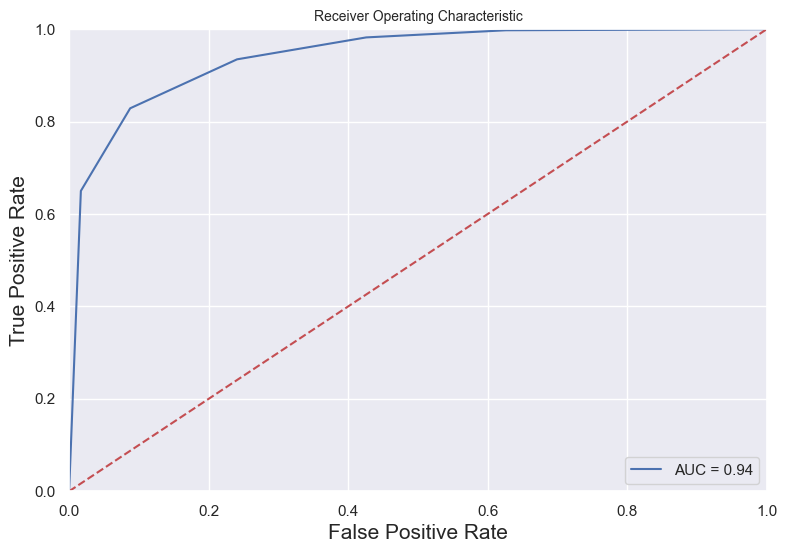

In [55]:
#fit the model
model =KNeighborsClassifier()
model.fit(X_train,y_train)

# prediction
pred_train = model.predict(X_train)
pred_val = model.predict(X_val)

# model name
model_name = str(type(model)).split(".")[-1][0:-2]
print(f"\t\t{model_name.upper()} MODEL\n")

print('Training part:')
print(classification_report(y_train, pred_train,
                                    target_names=['Not enrolled', 'enrolled']))
print('validation part:')
print(classification_report(y_val, pred_val,
                                    target_names=['Not enrolled', 'enrolled']))
print("Accuracy score for traing dataset",accuracy_score(y_train, pred_train))
print("Accuracy score for validation dataset",accuracy_score(y_val, pred_val))

cross_val_score(model,X_val,y_val)

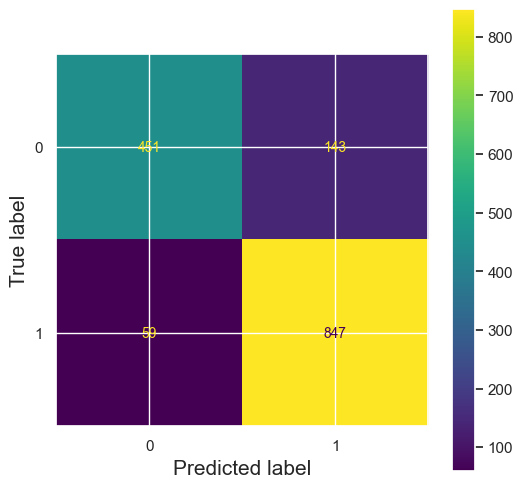

In [56]:
cm = confusion_matrix(y_val, pred_val, labels=model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=model.classes_)
disp.plot()

### Observations:

- This model relatively has high bias, which means that it doesn't learn the training data well when compared to SVM.


		SGDCLASSIFIER MODEL

Training part:
              precision    recall  f1-score   support

Not enrolled       0.83      0.85      0.84      1721
    enrolled       0.91      0.89      0.90      2779

    accuracy                           0.87      4500
   macro avg       0.87      0.87      0.87      4500
weighted avg       0.88      0.87      0.87      4500

validation part:
              precision    recall  f1-score   support

Not enrolled       0.85      0.86      0.86       594
    enrolled       0.91      0.90      0.91       906

    accuracy                           0.89      1500
   macro avg       0.88      0.88      0.88      1500
weighted avg       0.89      0.89      0.89      1500

Accuracy score for traing dataset 0.8744444444444445
Accuracy score for validation dataset 0.888
{'fit_time': array([0.08423829, 0.06528759, 0.1423955 , 0.22897768, 0.09517717]), 'score_time': array([0.0153029 , 0.00836492, 0.04859495, 0.0092926 , 0.00918913]), 'test_score': array([0.845555

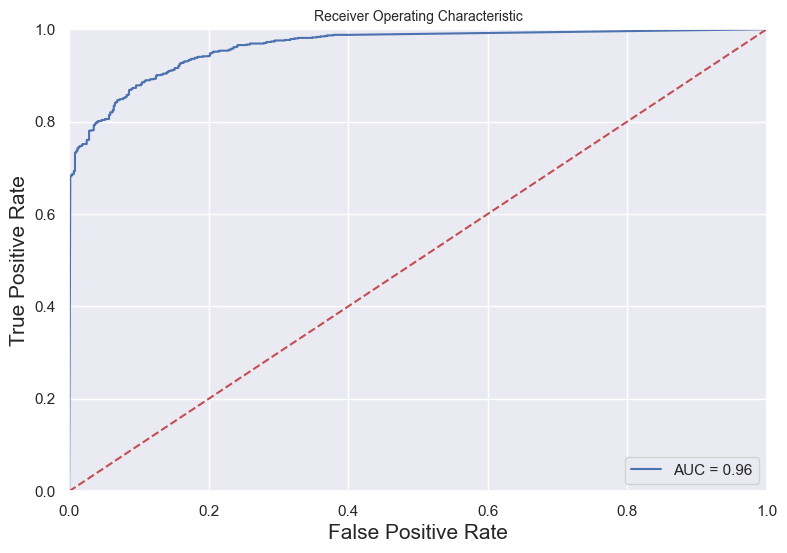

In [57]:
#fit the model
model =SGDClassifier(loss='modified_huber',n_jobs=-1,random_state=42)
model.fit(X_train,y_train)

# prediction
pred_train = model.predict(X_train)
pred_val = model.predict(X_val)

# model name
model_name = str(type(model)).split(".")[-1][0:-2]
print(f"\t\t{model_name.upper()} MODEL\n")

print('Training part:')
print(classification_report(y_train, pred_train,
                                    target_names=['Not enrolled', 'enrolled']))
print('validation part:')
print(classification_report(y_val, pred_val,
                                    target_names=['Not enrolled', 'enrolled']))
print("Accuracy score for traing dataset",accuracy_score(y_train, pred_train))
print("Accuracy score for validation dataset",accuracy_score(y_val, pred_val))

cross_val_score(model,X_val,y_val)

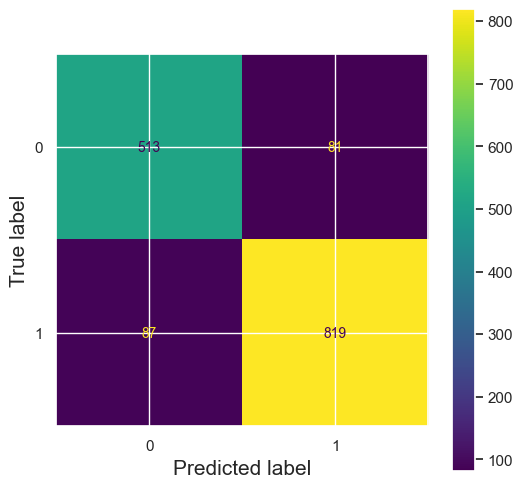

In [58]:
cm = confusion_matrix(y_val, pred_val, labels=model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=model.classes_)
disp.plot()

### Observations:

- Among all the Non-Tree based models, LinearSVC stands tall interms of model performance. Let's see, if there is any tree-based/ensemble model performs much better than this.

### `Tree-based Models`

### `Decision Trees`

		DECISIONTREECLASSIFIER MODEL

Training part:
              precision    recall  f1-score   support

Not enrolled       1.00      1.00      1.00      1721
    enrolled       1.00      1.00      1.00      2779

    accuracy                           1.00      4500
   macro avg       1.00      1.00      1.00      4500
weighted avg       1.00      1.00      1.00      4500

validation part:
              precision    recall  f1-score   support

Not enrolled       1.00      1.00      1.00       594
    enrolled       1.00      1.00      1.00       906

    accuracy                           1.00      1500
   macro avg       1.00      1.00      1.00      1500
weighted avg       1.00      1.00      1.00      1500

Accuracy score for traing dataset 1.0
Accuracy score for validation dataset 1.0
{'fit_time': array([0.04355192, 0.03490925, 0.03326583, 0.03380203, 0.03270102]), 'score_time': array([0.01151156, 0.01283002, 0.01004529, 0.01078629, 0.00913548]), 'test_score': array([1.        , 1.  

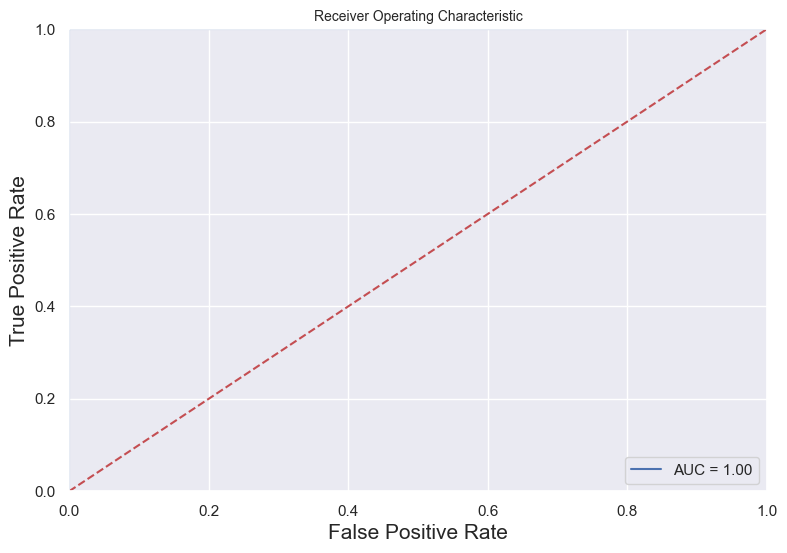

In [59]:
#fit the model
model =DecisionTreeClassifier(random_state=42)
model.fit(X_train,y_train)

# prediction
pred_train = model.predict(X_train)
pred_val = model.predict(X_val)

# model name
model_name = str(type(model)).split(".")[-1][0:-2]
print(f"\t\t{model_name.upper()} MODEL\n")

print('Training part:')
print(classification_report(y_train, pred_train,
                                    target_names=['Not enrolled', 'enrolled']))
print('validation part:')
print(classification_report(y_val, pred_val,
                                    target_names=['Not enrolled', 'enrolled']))
print("Accuracy score for traing dataset",accuracy_score(y_train, pred_train))
print("Accuracy score for validation dataset",accuracy_score(y_val, pred_val))

cross_val_score(model,X_val,y_val)

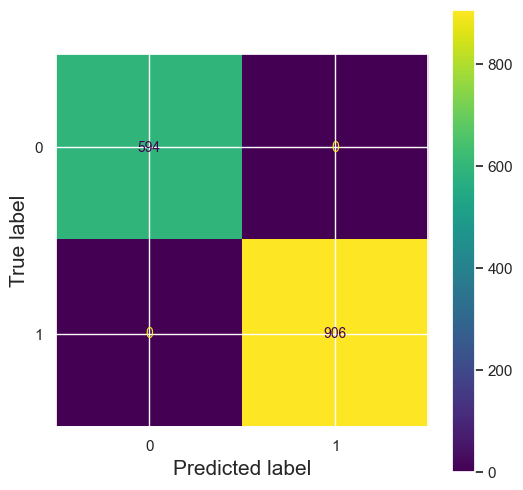

In [60]:
cm = confusion_matrix(y_val, pred_val, labels=model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=model.classes_)
disp.plot()

### Observations:
- Model is overfitting. It wouldn't perform well on test data for sure.

## `Random Forest Classifier`

		RANDOMFORESTCLASSIFIER MODEL

Training part:
              precision    recall  f1-score   support

Not enrolled       1.00      1.00      1.00      1721
    enrolled       1.00      1.00      1.00      2779

    accuracy                           1.00      4500
   macro avg       1.00      1.00      1.00      4500
weighted avg       1.00      1.00      1.00      4500

validation part:
              precision    recall  f1-score   support

Not enrolled       1.00      1.00      1.00       594
    enrolled       1.00      1.00      1.00       906

    accuracy                           1.00      1500
   macro avg       1.00      1.00      1.00      1500
weighted avg       1.00      1.00      1.00      1500

Accuracy score for traing dataset 1.0
Accuracy score for validation dataset 1.0
{'fit_time': array([1.38380313, 1.3405292 , 1.2469542 , 1.52707219, 1.37498093]), 'score_time': array([0.06236196, 0.06748867, 0.06904244, 0.06316781, 0.05799437]), 'test_score': array([0.99888889, 1.  

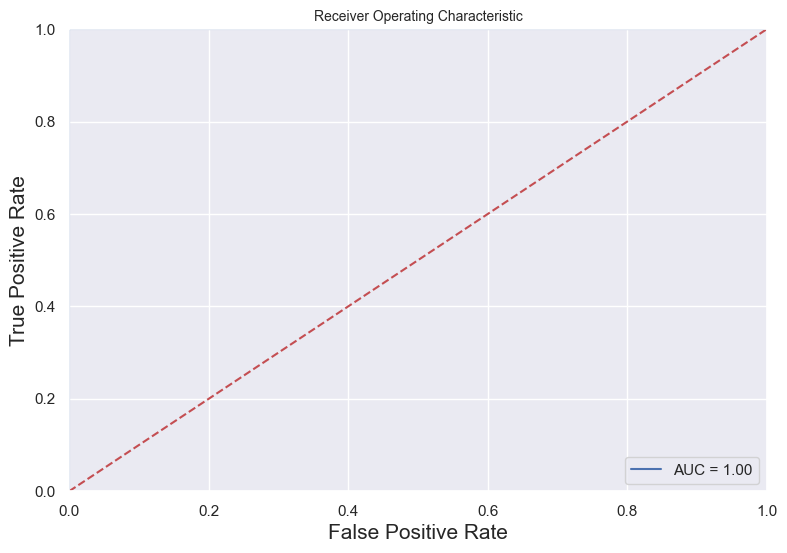

In [61]:
#fit the model
model =RandomForestClassifier(random_state=42)
model.fit(X_train,y_train)

# prediction
pred_train = model.predict(X_train)
pred_val = model.predict(X_val)

# model name
model_name = str(type(model)).split(".")[-1][0:-2]
print(f"\t\t{model_name.upper()} MODEL\n")

print('Training part:')
print(classification_report(y_train, pred_train,
                                    target_names=['Not enrolled', 'enrolled']))
print('validation part:')
print(classification_report(y_val, pred_val,
                                    target_names=['Not enrolled', 'enrolled']))
print("Accuracy score for traing dataset",accuracy_score(y_train, pred_train))
print("Accuracy score for validation dataset",accuracy_score(y_val, pred_val))

cross_val_score(model,X_val,y_val)

### Observations:
- RandomForest is an ensemble of decision trees, which is also overfitting.

- Hence, let's try to optimize the SVM hyperparameters for better model performance.

## `Hyperparameter Tuning`

		LINEARSVC MODEL

Training part:
              precision    recall  f1-score   support

Not enrolled       0.85      0.83      0.84      1721
    enrolled       0.90      0.91      0.91      2779

    accuracy                           0.88      4500
   macro avg       0.88      0.87      0.87      4500
weighted avg       0.88      0.88      0.88      4500

validation part:
              precision    recall  f1-score   support

Not enrolled       0.89      0.86      0.87       594
    enrolled       0.91      0.93      0.92       906

    accuracy                           0.90      1500
   macro avg       0.90      0.89      0.90      1500
weighted avg       0.90      0.90      0.90      1500

Accuracy score for traing dataset 0.8822222222222222
Accuracy score for validation dataset 0.9013333333333333
{'fit_time': array([0.02913833, 0.0268631 , 0.03563142, 0.06193328, 0.02399945]), 'score_time': array([0.01236939, 0.01134849, 0.02035928, 0.01465917, 0.01161838]), 'test_score': array(

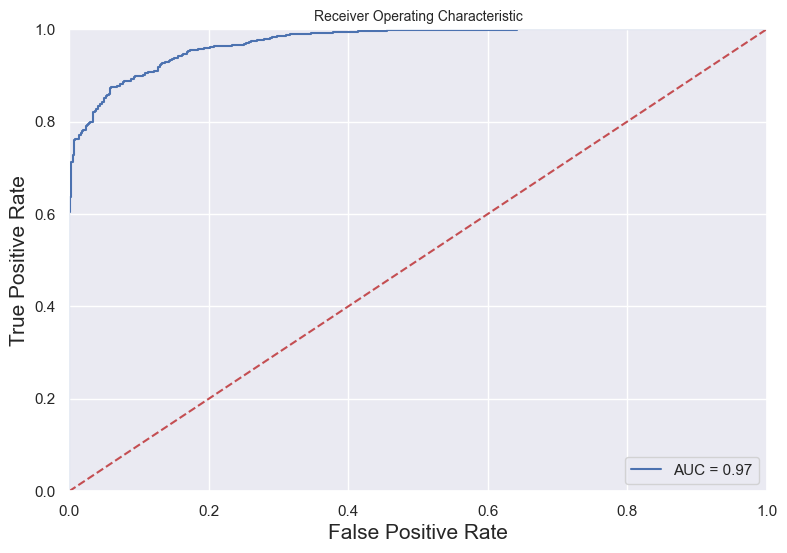

In [62]:
model =LinearSVC()
model.fit(X_train,y_train)

# prediction
pred_train = model.predict(X_train)
pred_val = model.predict(X_val)

# model name
model_name = str(type(model)).split(".")[-1][0:-2]
print(f"\t\t{model_name.upper()} MODEL\n")

print('Training part:')
print(classification_report(y_train, pred_train,
                                    target_names=['Not enrolled', 'enrolled']))
print('validation part:')
print(classification_report(y_val, pred_val,
                                    target_names=['Not enrolled', 'enrolled']))
print("Accuracy score for traing dataset",accuracy_score(y_train, pred_train))
print("Accuracy score for validation dataset",accuracy_score(y_val, pred_val))

cross_val_score(model,X_val,y_val)

In [63]:
model.get_params()

{'C': 1.0,
 'class_weight': None,
 'dual': 'auto',
 'fit_intercept': True,
 'intercept_scaling': 1,
 'loss': 'squared_hinge',
 'max_iter': 1000,
 'multi_class': 'ovr',
 'penalty': 'l2',
 'random_state': None,
 'tol': 0.0001,
 'verbose': 0}

The Hyperparamer Tuning suggestions for SVM

For Better Accuracy

 - Choose the Right Kernel
 - Optimize C (Regularization Parameter)
 - Optimize Gamma (for RBF Kernel)

To avoid Overitting

 - Reduce Model Complexity
 - Use Regularization
 - Use More data

In [64]:
from sklearn.svm import SVC
from sklearn.model_selection import RandomizedSearchCV

# Define the parameter grid
rscv_params = {
    'C': [0.1, 1, 10, 100],  # Regularization parameter
    'kernel': ['linear', 'rbf', 'poly', 'sigmoid'],  # Kernel types
    'gamma': ['scale', 'auto', 0.001, 0.01, 0.1, 1],  # Kernel coefficient (for rbf, poly, sigmoid)
    'degree': [2, 3, 4],  # Degree of polynomial kernel
    'coef0': [0.0, 0.5, 1.0],  # Independent term in poly and sigmoid kernels
}

# Initialize the model
svm = SVC()

# Perform GridSearchCV
svm_rscv_model = RandomizedSearchCV(svm, rscv_params, cv=5, scoring='accuracy', n_jobs=-1, verbose=2)
svm_rscv_model.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(cv=5, estimator=SVC(), n_jobs=-1,
                   param_distributions={'C': [0.1, 1, 10, 100],
                                        'coef0': [0.0, 0.5, 1.0],
                                        'degree': [2, 3, 4],
                                        'gamma': ['scale', 'auto', 0.001, 0.01,
                                                  0.1, 1],
                                        'kernel': ['linear', 'rbf', 'poly',
                                                   'sigmoid']},
                   scoring='accuracy', verbose=2)

In [65]:
initial_params = {
    "random_state":42,
    "n_jobs":-1
}

In [66]:
# Best parameters and score
print("Best Parameters:", svm_rscv_model.best_params_)
print("Best Score:", svm_rscv_model.best_score_)

Best Parameters: {'kernel': 'poly', 'gamma': 0.1, 'degree': 4, 'coef0': 1.0, 'C': 10}
Best Score: 0.9339999999999999


In [67]:
best_rscv_params = svm_rscv_model.best_params_
best_rscv_params.update(initial_params)
best_rscv_params

{'kernel': 'poly',
 'gamma': 0.1,
 'degree': 4,
 'coef0': 1.0,
 'C': 10,
 'random_state': 42,
 'n_jobs': -1}

In [68]:
best_rscv_params.pop("n_jobs")

-1

### `Optimized SVM`

		SVC svm

Training part:
              precision    recall  f1-score   support

Not enrolled       0.94      0.95      0.94      1721
    enrolled       0.97      0.96      0.97      2779

    accuracy                           0.96      4500
   macro avg       0.95      0.96      0.95      4500
weighted avg       0.96      0.96      0.96      4500

validation part:
              precision    recall  f1-score   support

Not enrolled       0.93      0.93      0.93       594
    enrolled       0.95      0.96      0.96       906

    accuracy                           0.95      1500
   macro avg       0.94      0.94      0.94      1500
weighted avg       0.95      0.95      0.95      1500

Accuracy score for traing dataset 0.9568888888888889
Accuracy score for validation dataset 0.9466666666666667
{'fit_time': array([0.59859753, 0.6947279 , 0.7828629 , 0.62111521, 0.6814537 ]), 'score_time': array([0.07188821, 0.12719893, 0.06075025, 0.08110642, 0.07016993]), 'test_score': array([0.92777

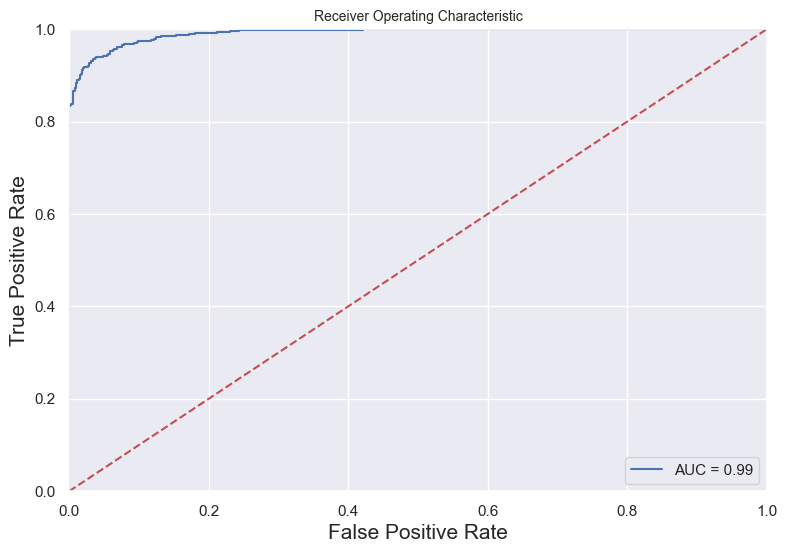

In [69]:
svm = SVC(**best_rscv_params)

svm.fit(X_train,y_train)

# prediction
pred_train = svm.predict(X_train)
pred_val = svm.predict(X_val)

# modelname
model_name = str(type(svm)).split(".")[-1][0:-2]
print(f"\t\t{model_name.upper()} svm\n")

print('Training part:')
print(classification_report(y_train, pred_train,
                                    target_names=['Not enrolled', 'enrolled']))
print('validation part:')
print(classification_report(y_val, pred_val,
                                    target_names=['Not enrolled', 'enrolled']))
print("Accuracy score for traing dataset",accuracy_score(y_train, pred_train))
print("Accuracy score for validation dataset",accuracy_score(y_val, pred_val))

cross_val_score(svm,X_val,y_val)

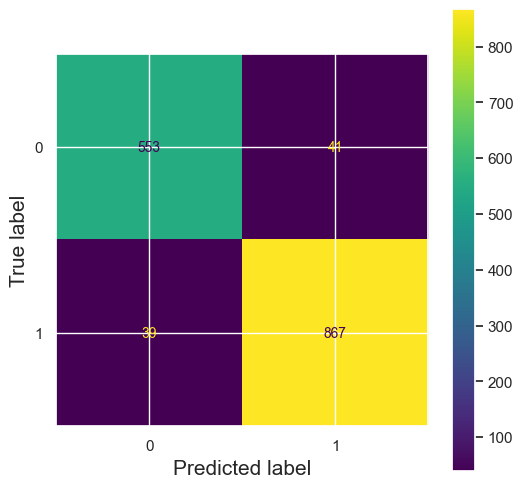

In [70]:
cm = confusion_matrix(y_val, pred_val, labels=svm.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=svm.classes_)
disp.plot()

In [73]:
best_rscv_params

{'kernel': 'poly',
 'gamma': 0.1,
 'degree': 4,
 'coef0': 1.0,
 'C': 10,
 'random_state': 42}

In [72]:
svm.get_params()

{'C': 10,
 'break_ties': False,
 'cache_size': 200,
 'class_weight': None,
 'coef0': 1.0,
 'decision_function_shape': 'ovr',
 'degree': 4,
 'gamma': 0.1,
 'kernel': 'poly',
 'max_iter': -1,
 'probability': False,
 'random_state': 42,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

In [71]:
import pickle

In [76]:
import os
os.makedirs("../models", exist_ok=True)

# Save the model inside the directory with a default name
model_path = os.path.join("../models", "svc-tuned.pkl")

with open(model_path, "wb") as f:
    pickle.dump(svm, f)

## `Checking model accuracy on Test data`

In [81]:
model_path = os.path.join("../models", "svc-tuned.pkl")

with open(model_path, "rb") as f:
    svm = pickle.load(f)

		SVC svm

Test part:
              precision    recall  f1-score   support

Not enrolled       0.93      0.91      0.92       574
    enrolled       0.95      0.96      0.95       926

    accuracy                           0.94      1500
   macro avg       0.94      0.93      0.94      1500
weighted avg       0.94      0.94      0.94      1500

Accuracy score for training dataset 0.9568888888888889
Accuracy score for test dataset 0.9393333333333334
{'fit_time': array([0.08967662, 0.10590076, 0.08903098, 0.09118342, 0.10351229]), 'score_time': array([0.01055264, 0.00911427, 0.00869203, 0.00877523, 0.00929284]), 'test_score': array([0.92777778, 0.93      , 0.93222222, 0.93555556, 0.94444444])}
Mean Cross validation score 0.9339999999999999
Bias Error: 0.06600000000000006
Variance Error: 3.387654320987633e-05
ROC AUC Score : 98.72%



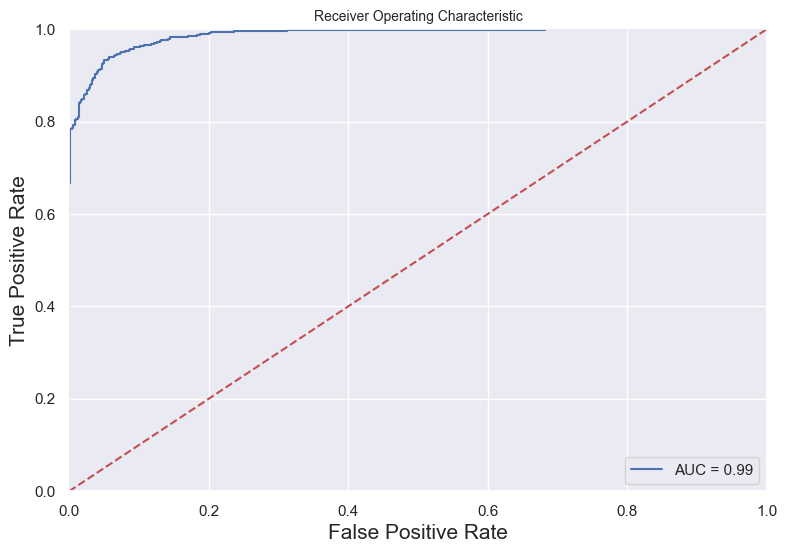

In [82]:
svm.fit(X_train,y_train)

# prediction
pred_train = svm.predict(X_train)
pred_test = svm.predict(X_test)

# modelname
model_name = str(type(svm)).split(".")[-1][0:-2]
print(f"\t\t{model_name.upper()} svm\n")


print('Test part:')
print(classification_report(y_test, pred_test,
                                    target_names=['Not enrolled', 'enrolled']))
print("Accuracy score for training dataset",accuracy_score(y_train, pred_train))
print("Accuracy score for test dataset",accuracy_score(y_test, pred_test))

cross_val_score(svm,X_test,y_test)

### Observations:

- SVM with Polynomial kernel is by far the best performing model for the given dataset.
- Low Bias and Low Variance
- Neither Overfitting nor underfitting

In [83]:
train_acc_list = [0.88,0.83,0.956,0.91,0.87,1,1]
clf_name_list = ["Log_reg","Gaus-NB","SVC","knn","sgd","DT","RF"]
test_acc_list = [0.53,0.84,0.939,0.87,0.89,1,1]

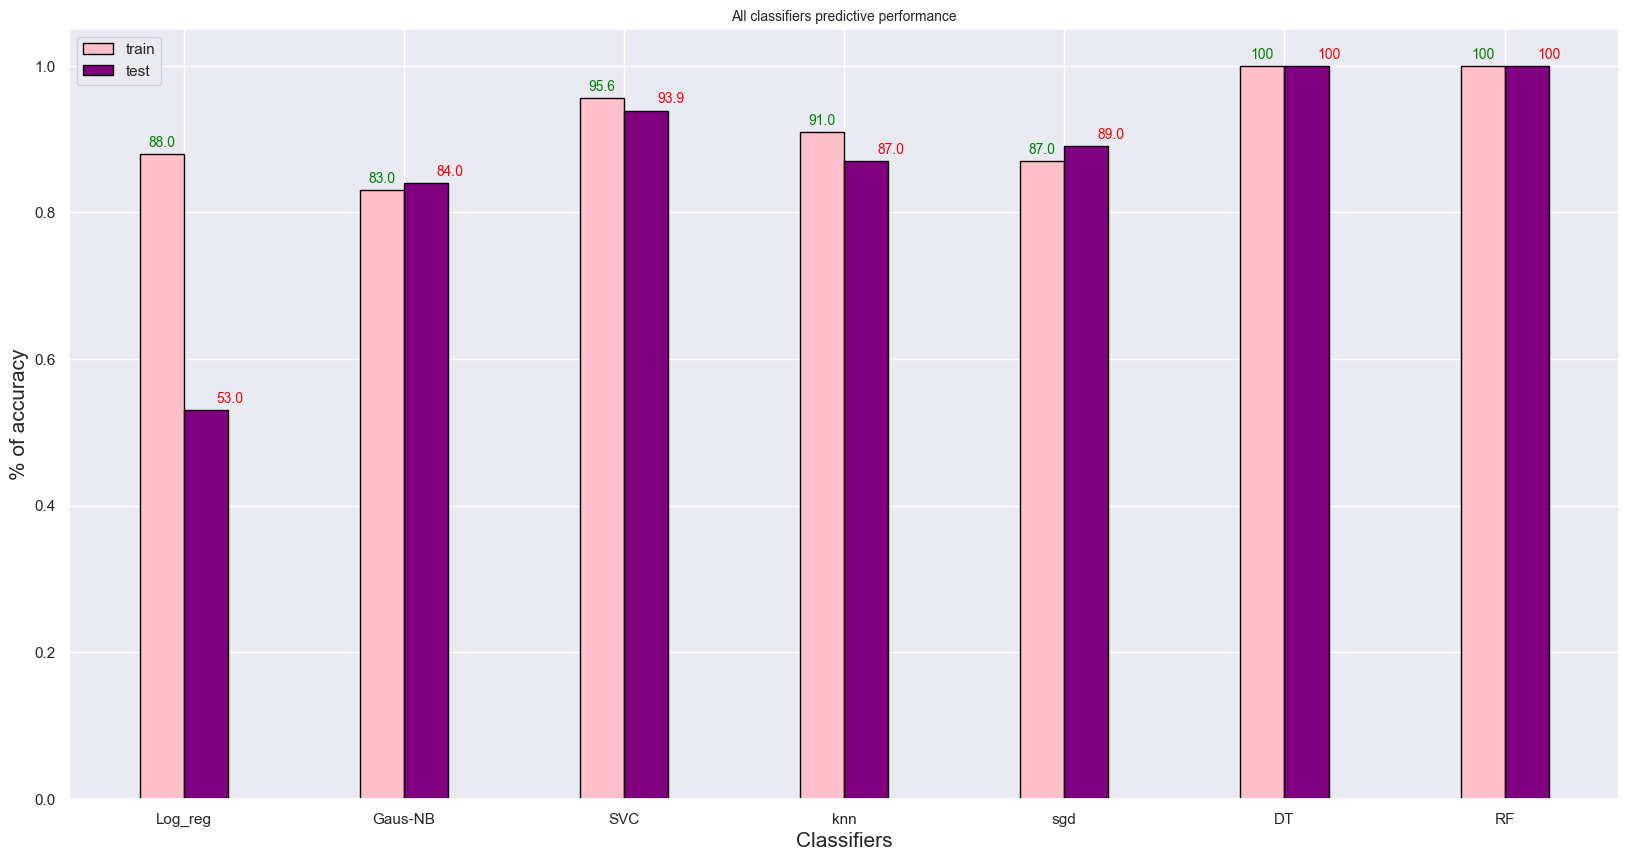

In [93]:
plt.figure(figsize=(20,10))

n = np.arange(7)
width = 0.2

plt.bar(n, train_acc_list, color = 'pink',
        width = width, edgecolor = 'black',
        label='train')
for i in range(len(train_acc_list)):
        plt.text(i,train_acc_list[i]+0.01,round(train_acc_list[i]*100,2),
                 ha = 'center',color = 'green')

plt.bar(n + width, test_acc_list, color = 'purple',
        width = width, edgecolor = 'black',
        label='test')

for i in range(len(test_acc_list)):
        plt.text(i+0.25,test_acc_list[i]+0.01,round(test_acc_list[i]*100,2),color = 'red')

plt.xlabel("Classifiers")
plt.ylabel("% of accuracy")
plt.title("All classifiers predictive performance")
  
plt.xticks(n + width/2,clf_name_list)
plt.legend()
  
plt.show()

## `Observation:`

- It is evident that **SVC is the best performing model**. It neither overfits nor underfits unlike DT and RF.

## `Conclusion:`

- The goal of the project is to develop a machine learning model that predicts whether an employee will opt in to a new voluntary insurance product based on demographic and employment-related data. 

- I have performed data analysis, data preprocessing, and data modelling with multiple machine learning models to achieve this. I have also extensively tuned the hyperparameters of SVM to achieve higher recall and F1-Score.

- The model is performing very good with the test data too.

- There are so many limitations with this model as the model is built only on the features that are provided in the dataset. There is always an improvement when it comes to Machine Learning models. Thus, with limited resources and time I have developed a reasonable model. With more research and more time, the performance of the model can be improved.